<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-works/05_image_preprocessing_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image preprocessing with OpenCV

##Setup

In [ ]:
%%shell

sudo apt install tesseract-ocr
pip install tesseract
pip install pytesseract
pip install Pillow==9.0.0

Just restart the colab environment.

In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
!tesseract --version

In [3]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [4]:
def img_display(im_data):
    dpi = 80
    #im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [5]:
image_name = 'sample2.png'

## Image preprocessing

###Obtain binary image

In [6]:
image = cv2.imread(image_name)

# Binarization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding 
img_thresh, img_binary = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

###Noise Removal



In [7]:
def noise_removal(image):
  kernel = np.ones((1, 1), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)

  kernel = np.ones((1, 1), np.uint8)
  image = cv2.erode(image, kernel, iterations=1)
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  image = cv2.medianBlur(image, 3)

  return image

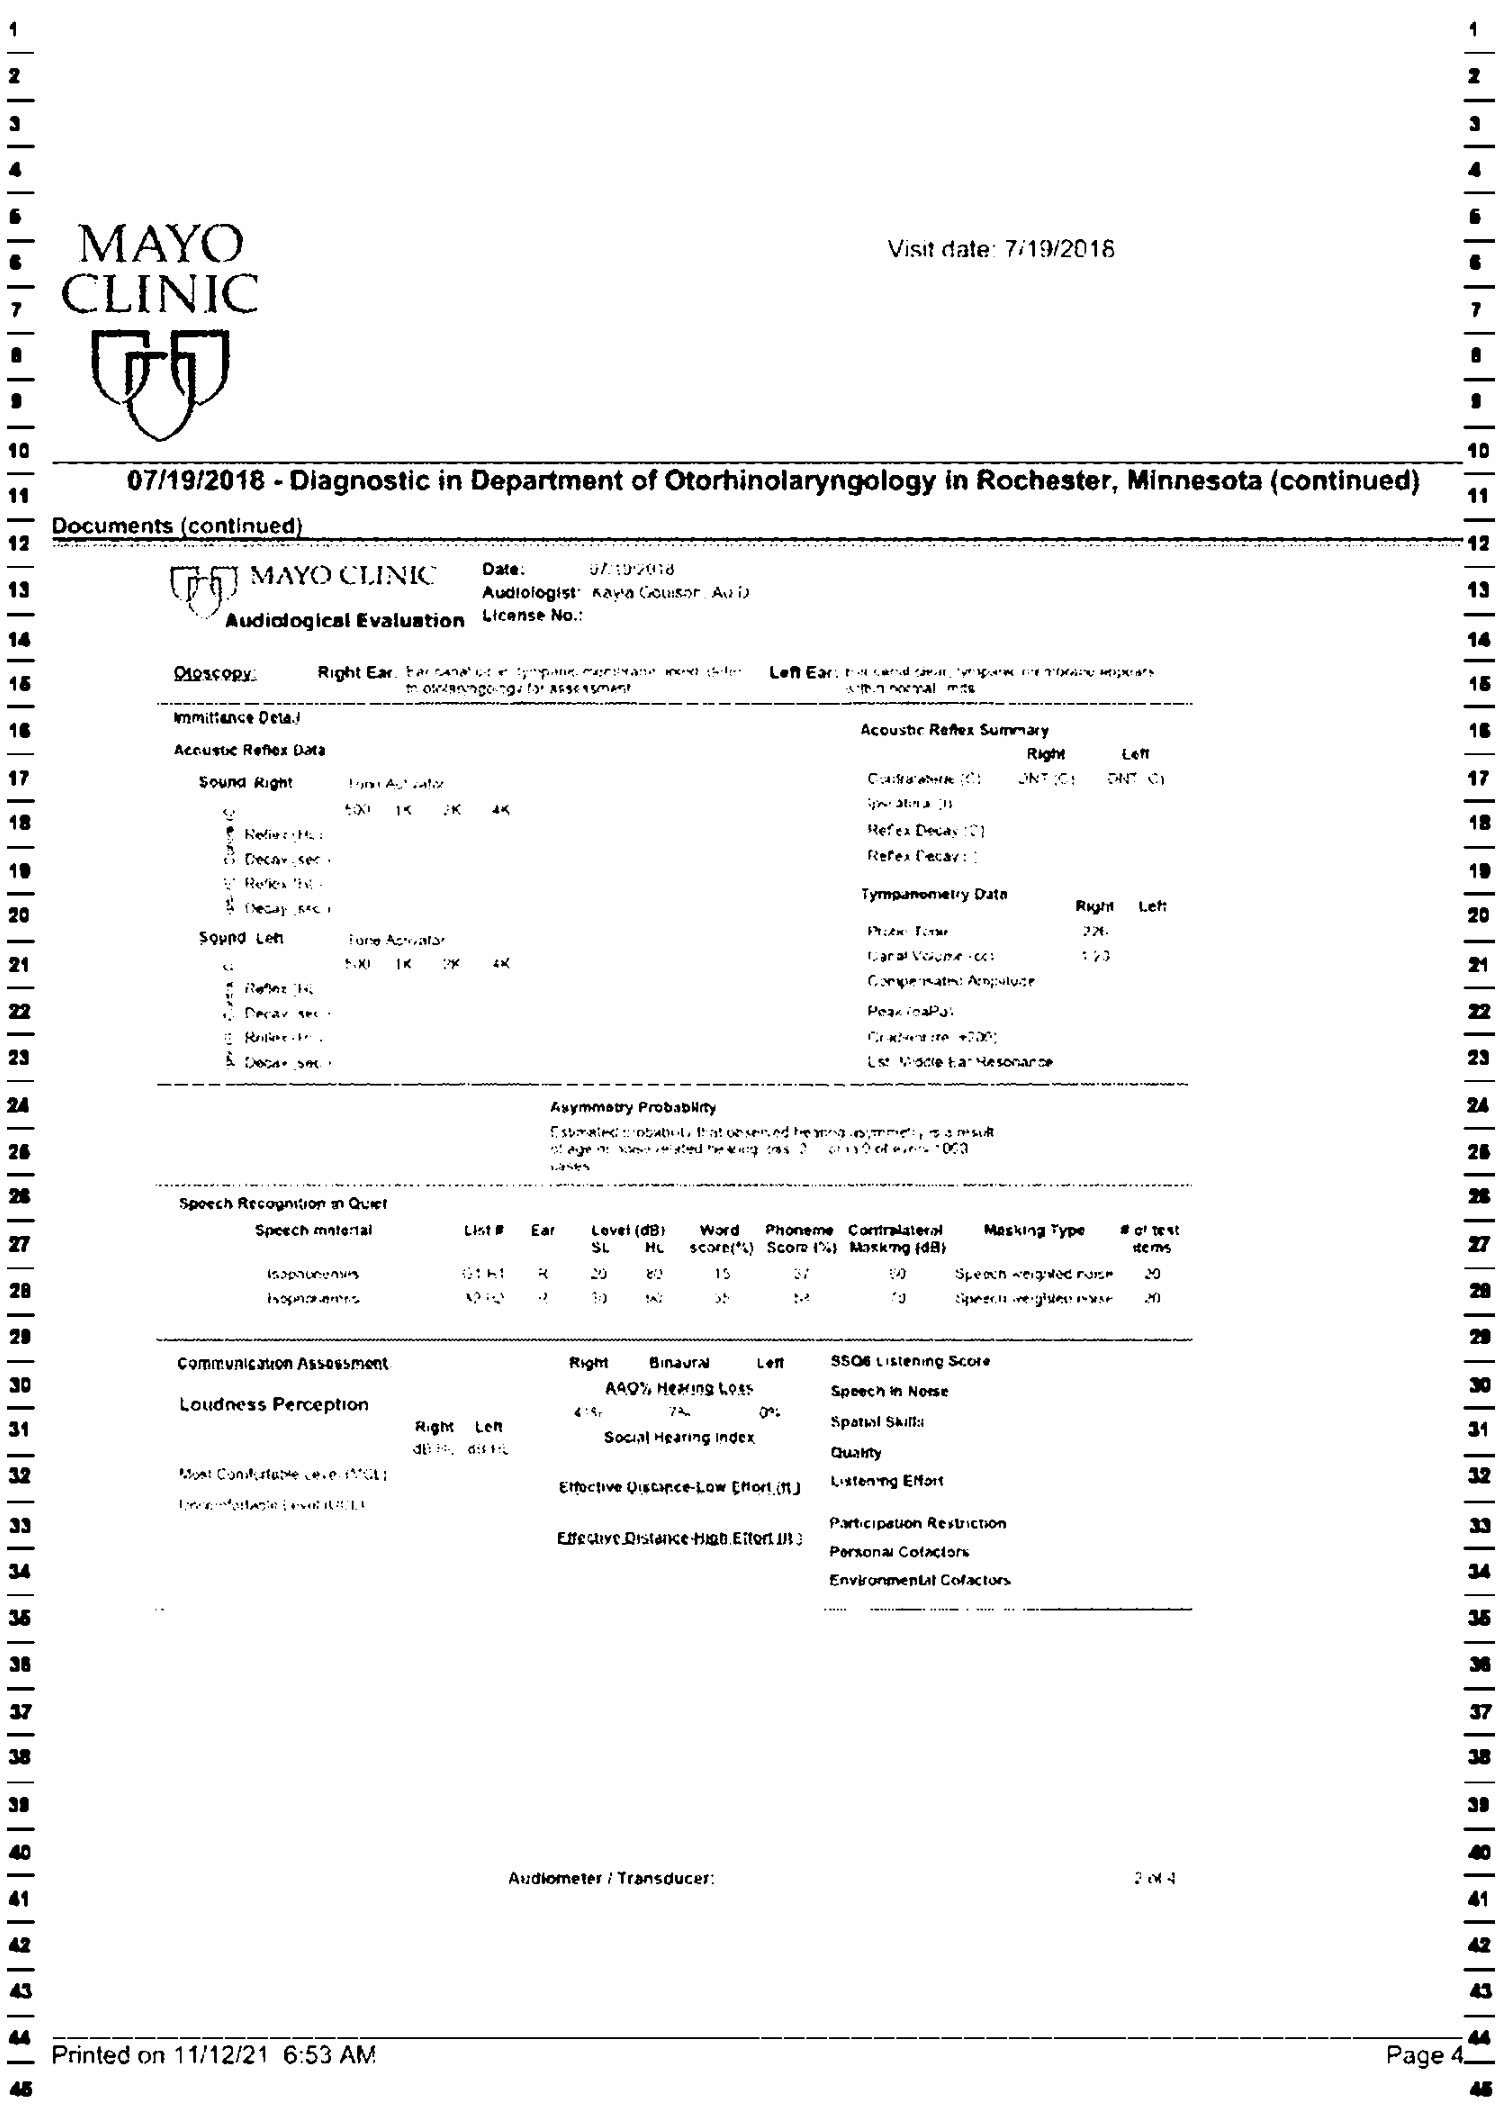

In [ ]:
# removing noise
noise_removed = noise_removal(img_binary)

img_display(noise_removed)

###Decrease font thickness using Erosion

In [ ]:
def thin_font(image):
  image = cv2.bitwise_not(image)
  kernel = np.ones((2, 2), np.uint8)
  image = cv2.erode(image, kernel, iterations=1)
  image = cv2.bitwise_not(image)
  
  return image

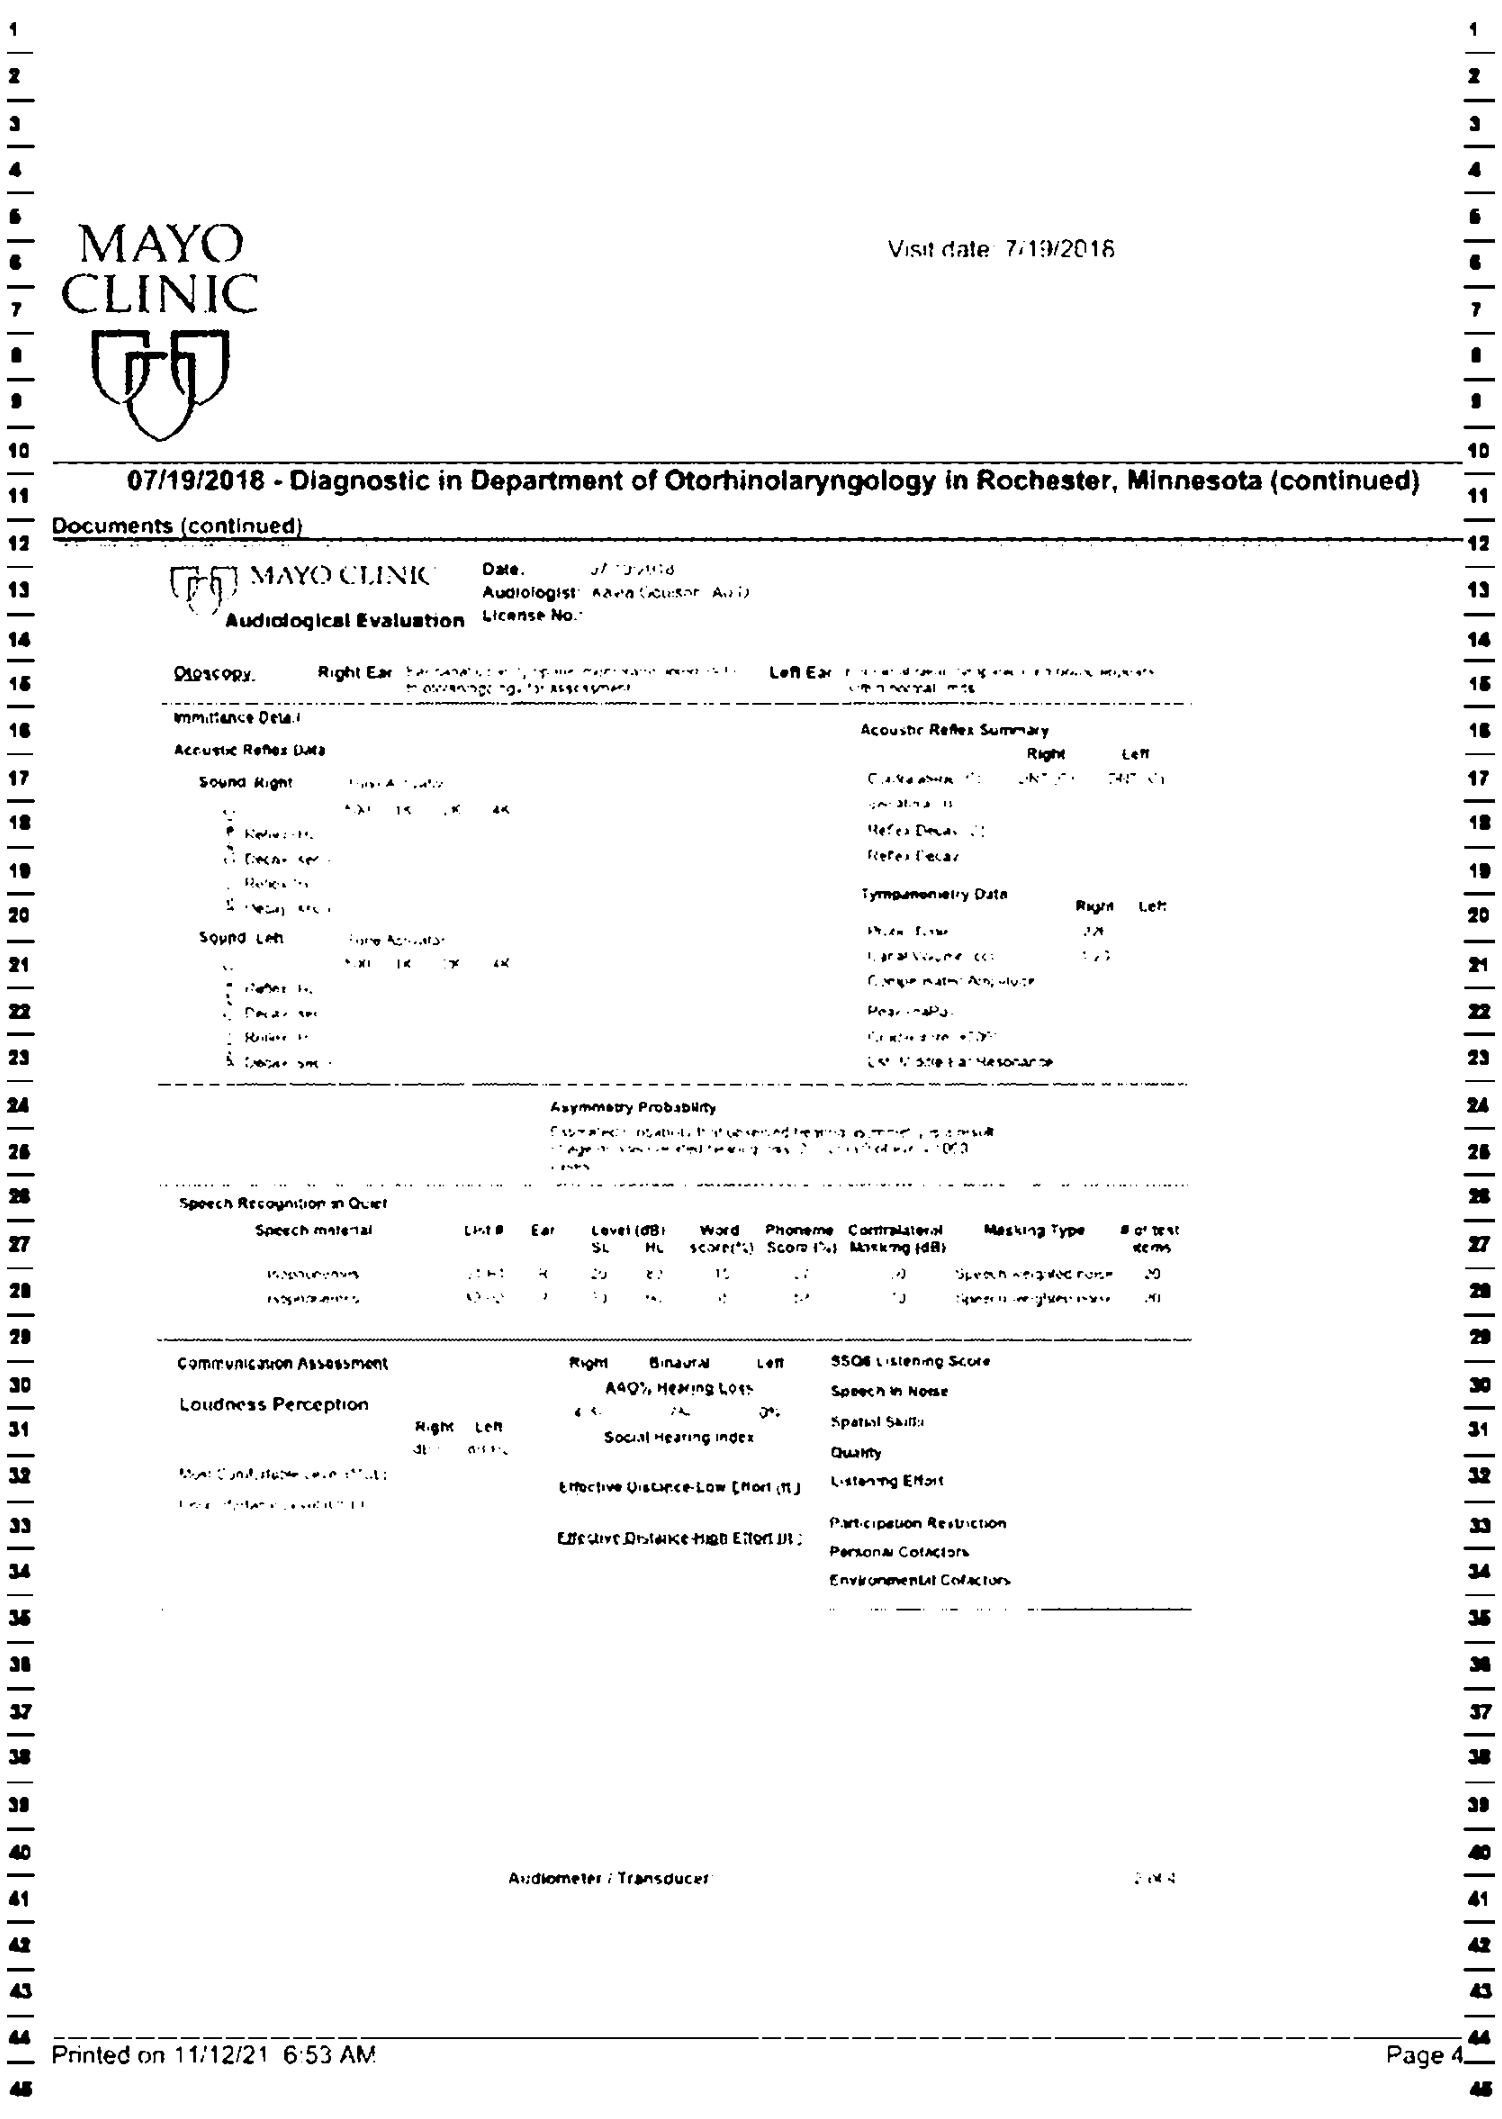

In [ ]:
# apply erosion
eroded_image = noise_removal(noise_removed)

img_display(eroded_image)

###Increase font thickness using Dilation

In [8]:
def thick_font(image):
  image = cv2.bitwise_not(image)
  kernel = np.ones((2, 2), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)
  image = cv2.bitwise_not(image)
  
  return image

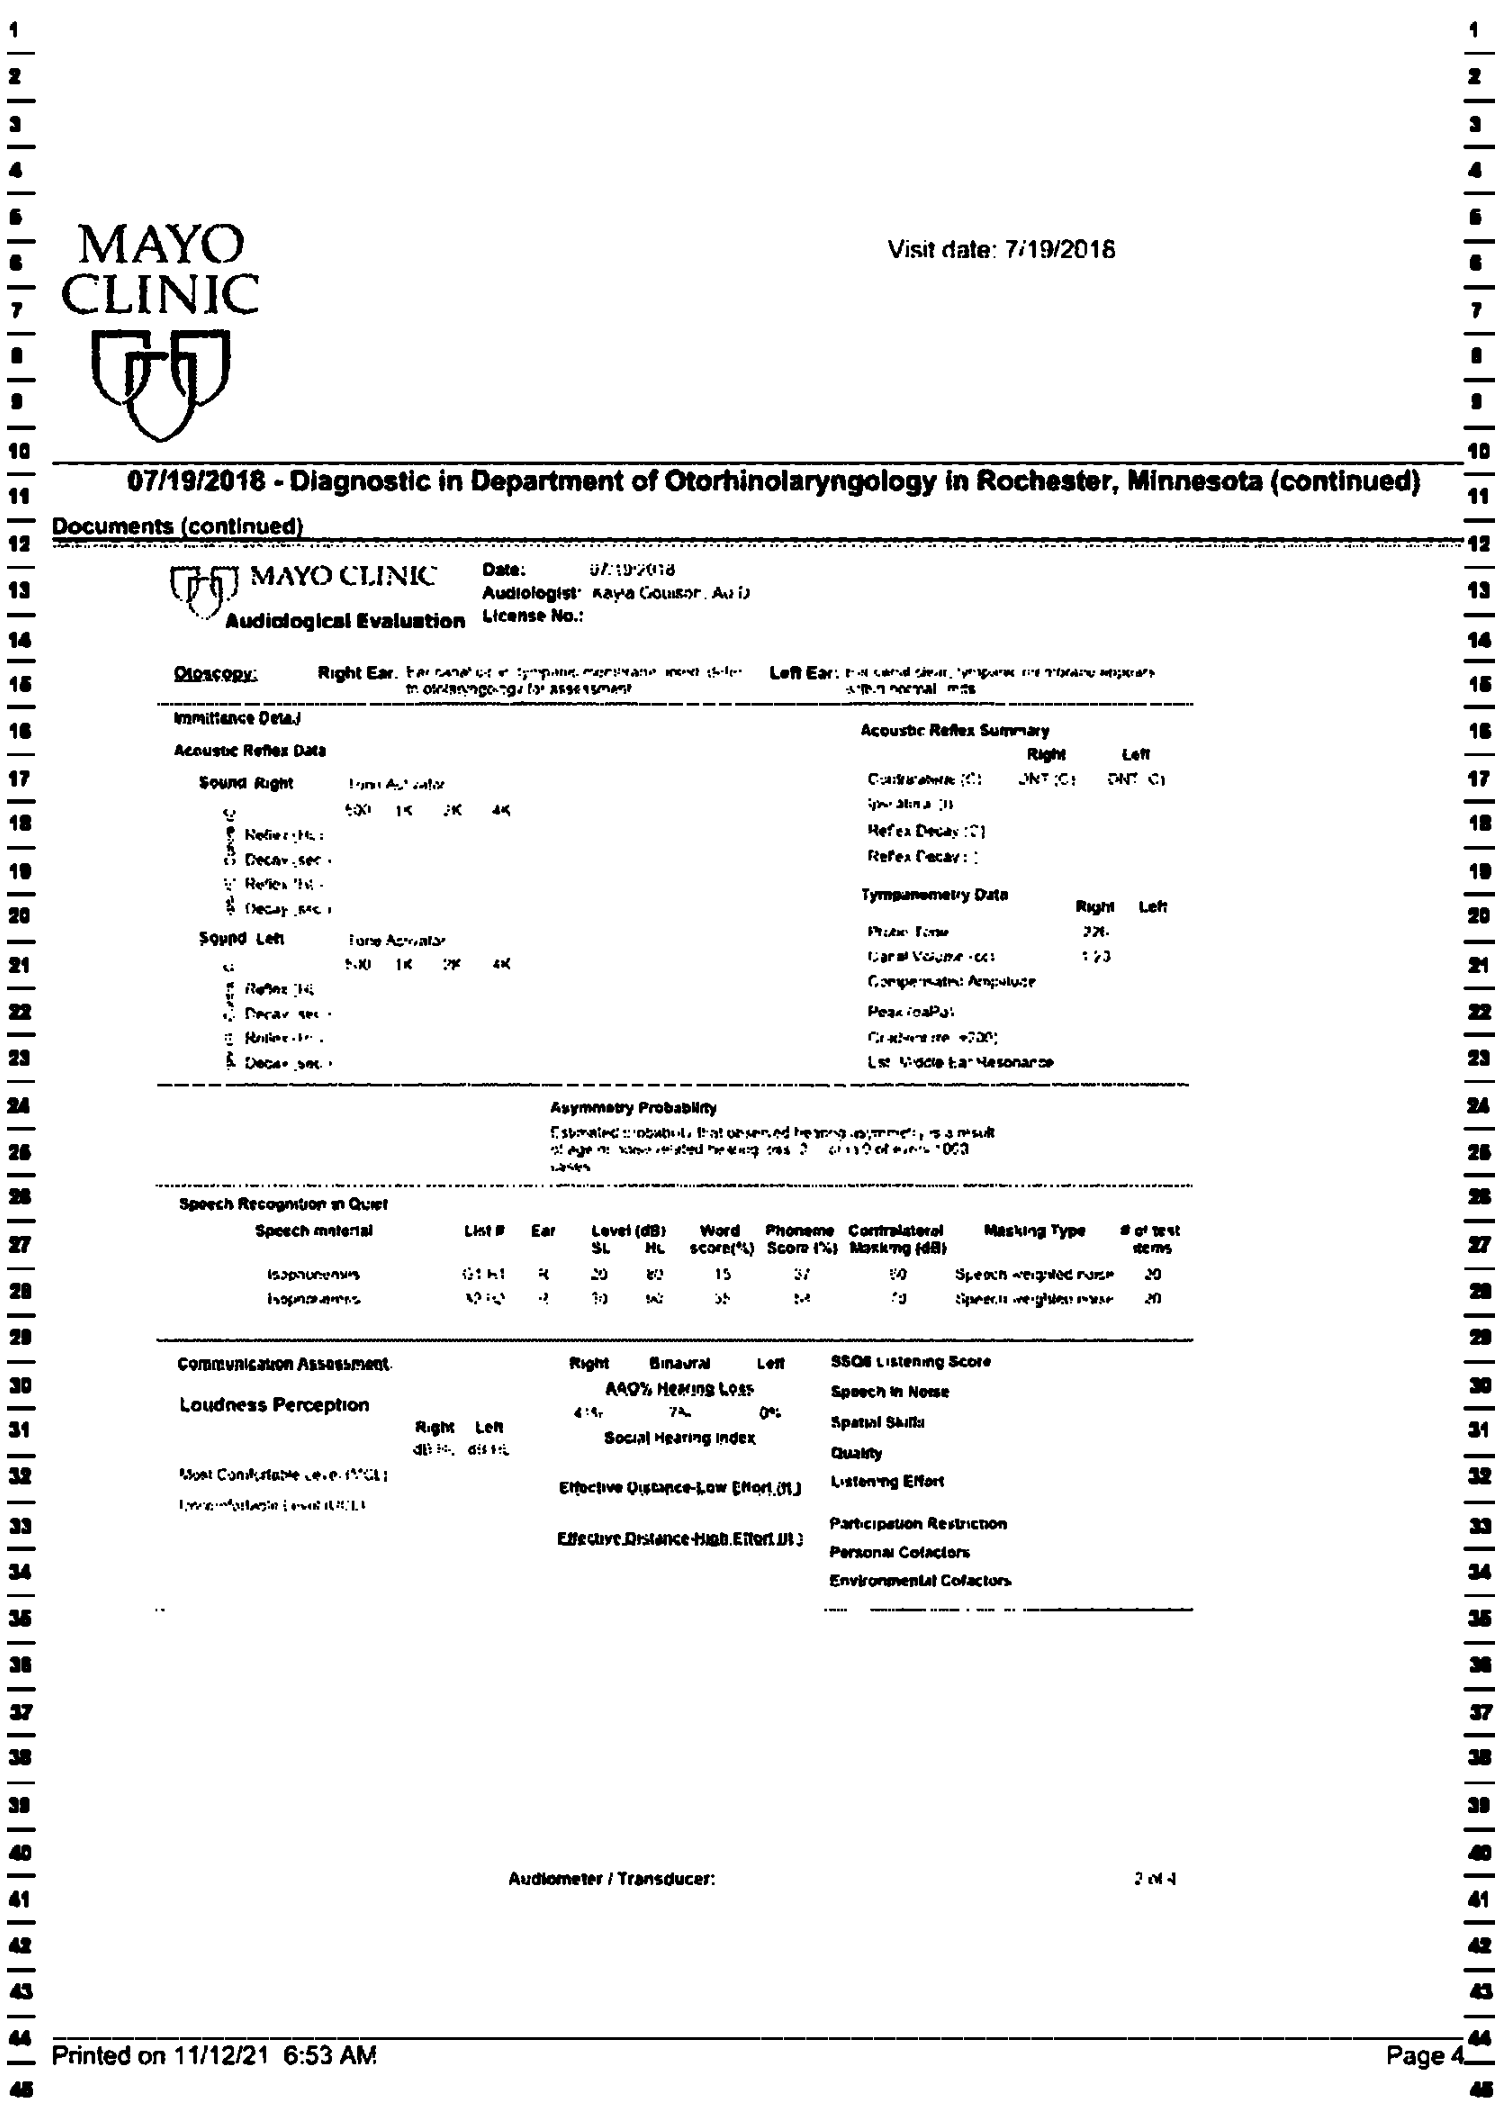

In [ ]:
# apply dilation
dilated_image = thick_font(noise_removed)
img_display(dilated_image)

###Removing Borders

In [ ]:
def remove_borders(image):
  contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
  cnt = cntsSorted[-1]
  x, y, w, h = cv2.boundingRect(cnt)
  cropped = image[y: y + h, x: x + w]

  return cropped

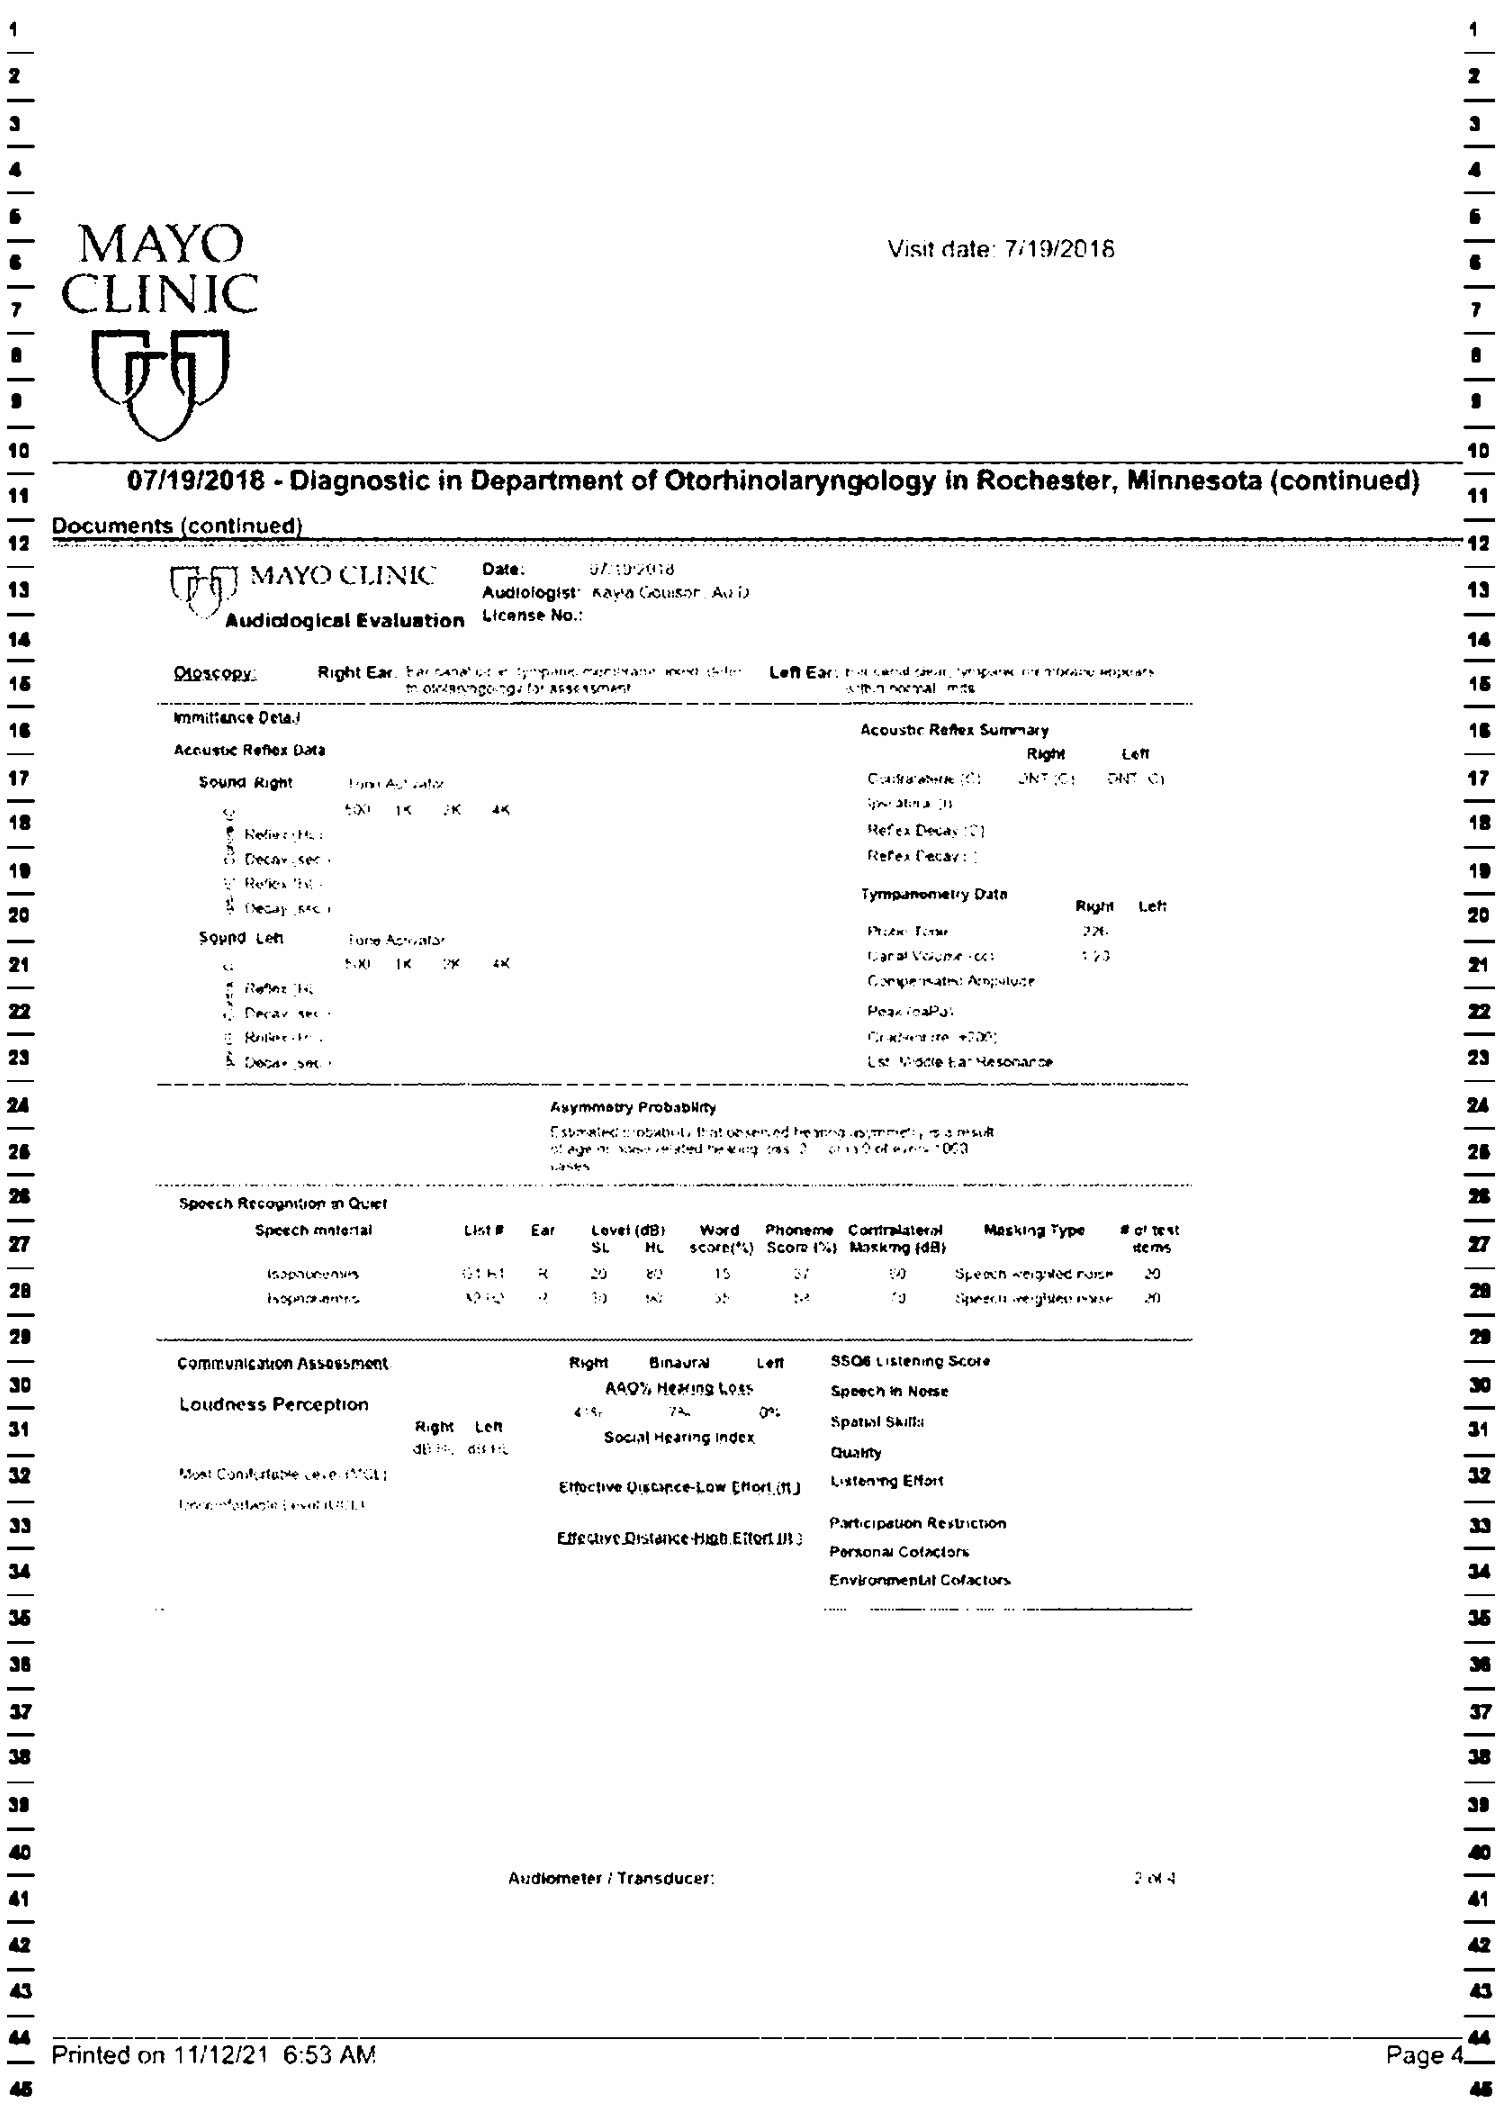

In [ ]:
no_borders = remove_borders(noise_removed)
img_display(no_borders)

###Remove horizontal/vertical lines

In [ ]:
result = image.copy()

# Obtain binary image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
#contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts, _ = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

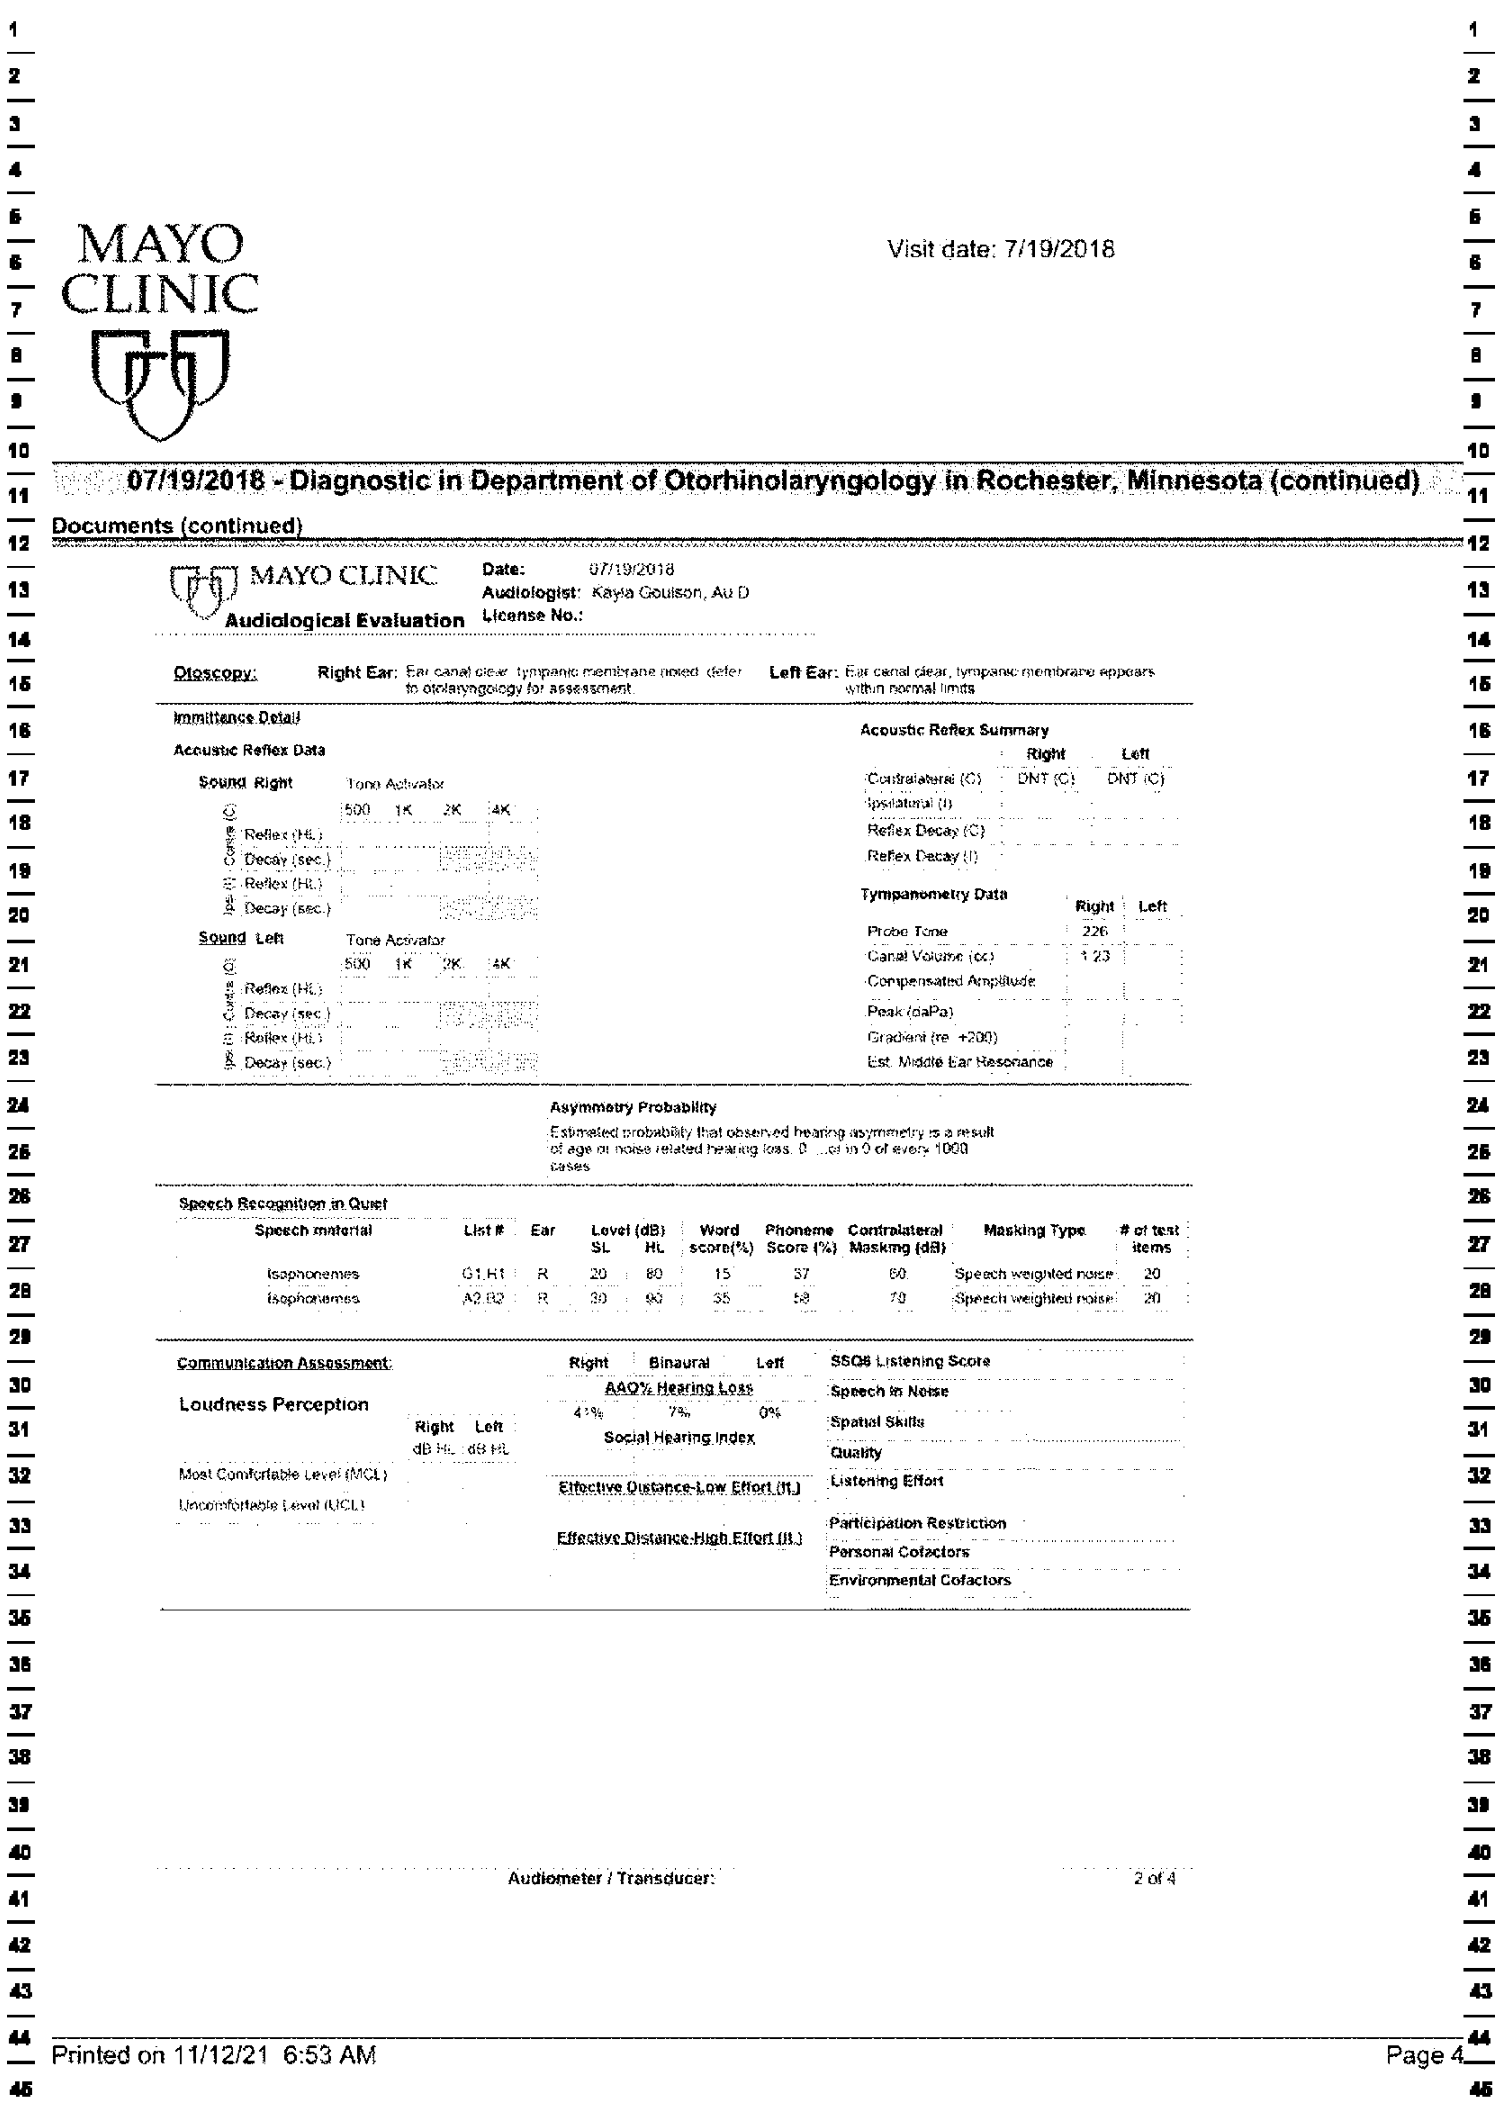

In [ ]:
cv2.imwrite('result.png', result)
image_result = cv2.imread("result.png")
img_display(image_result)

In [ ]:
# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,80))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

In [ ]:
cv2.imwrite('result.png', result)

True

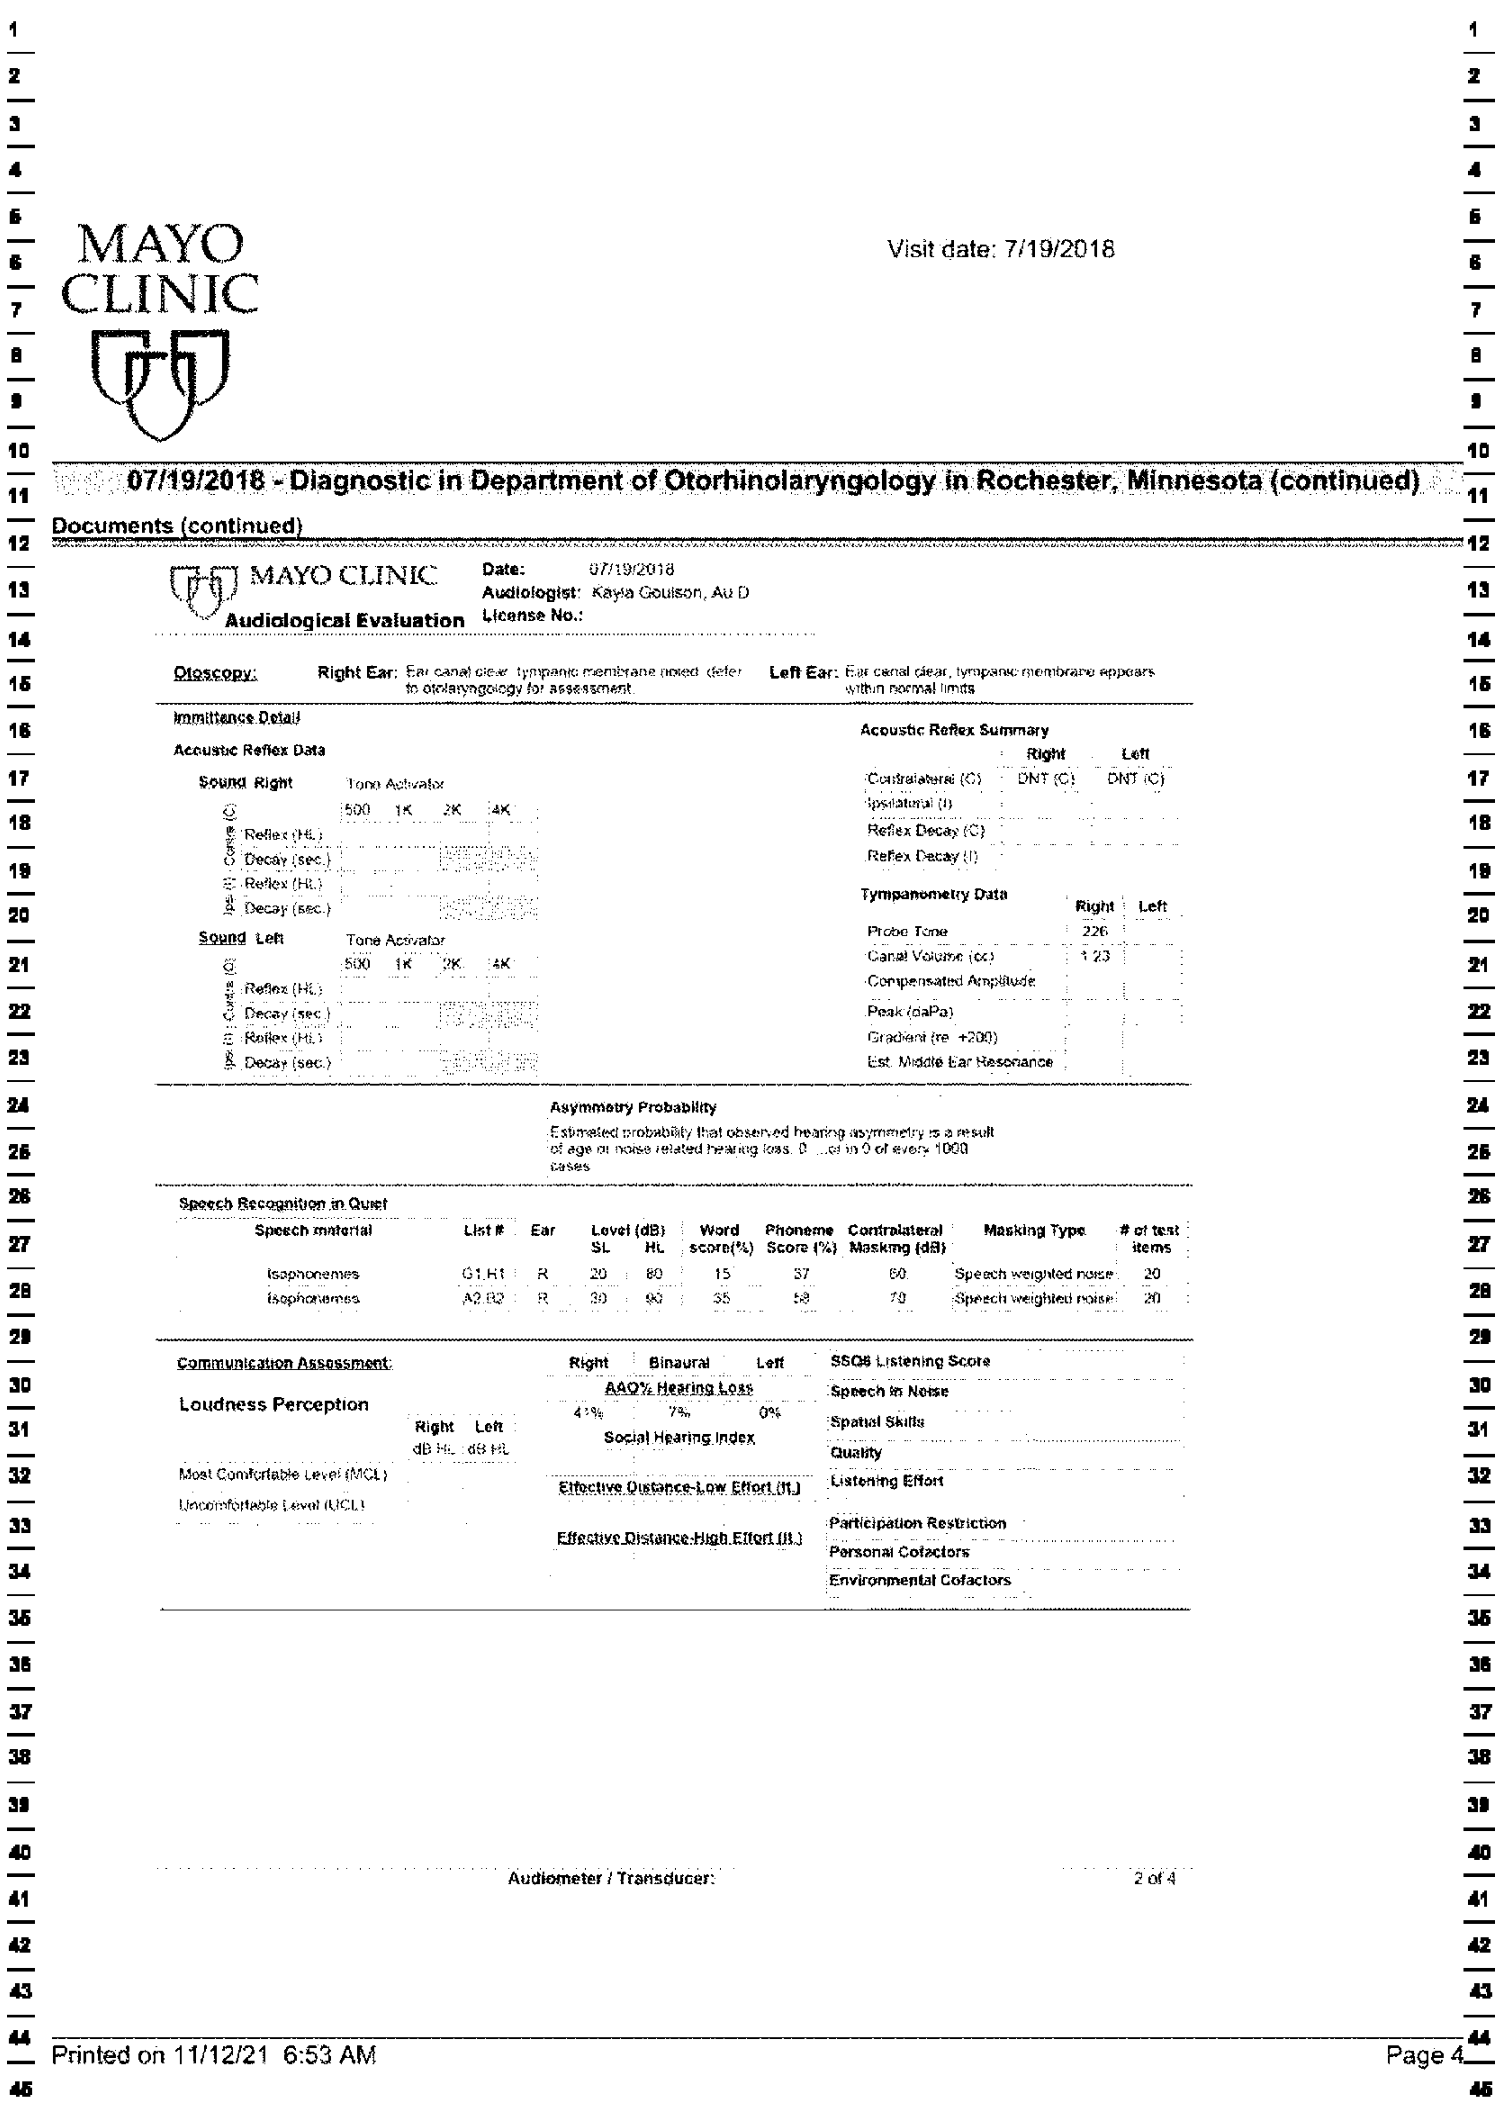

In [ ]:
image_result = cv2.imread("result.png")
img_display(image_result)

In [ ]:
laplacian = cv2.Laplacian(image,cv2.CV_8UC1) # Laplacian OR
edges = cv2.Canny(image,80,10,apertureSize = 3) # canny Edge OR
# Output dtype = cv2.CV_8U # Sobel
sobelx8u = cv2.Sobel(image,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

# Hough's Probabilistic Line Transform 
minLineLength = 900
maxLineGap = 100
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(255,255,255),2)

cv2.imwrite('houghlines.jpg',image)

True

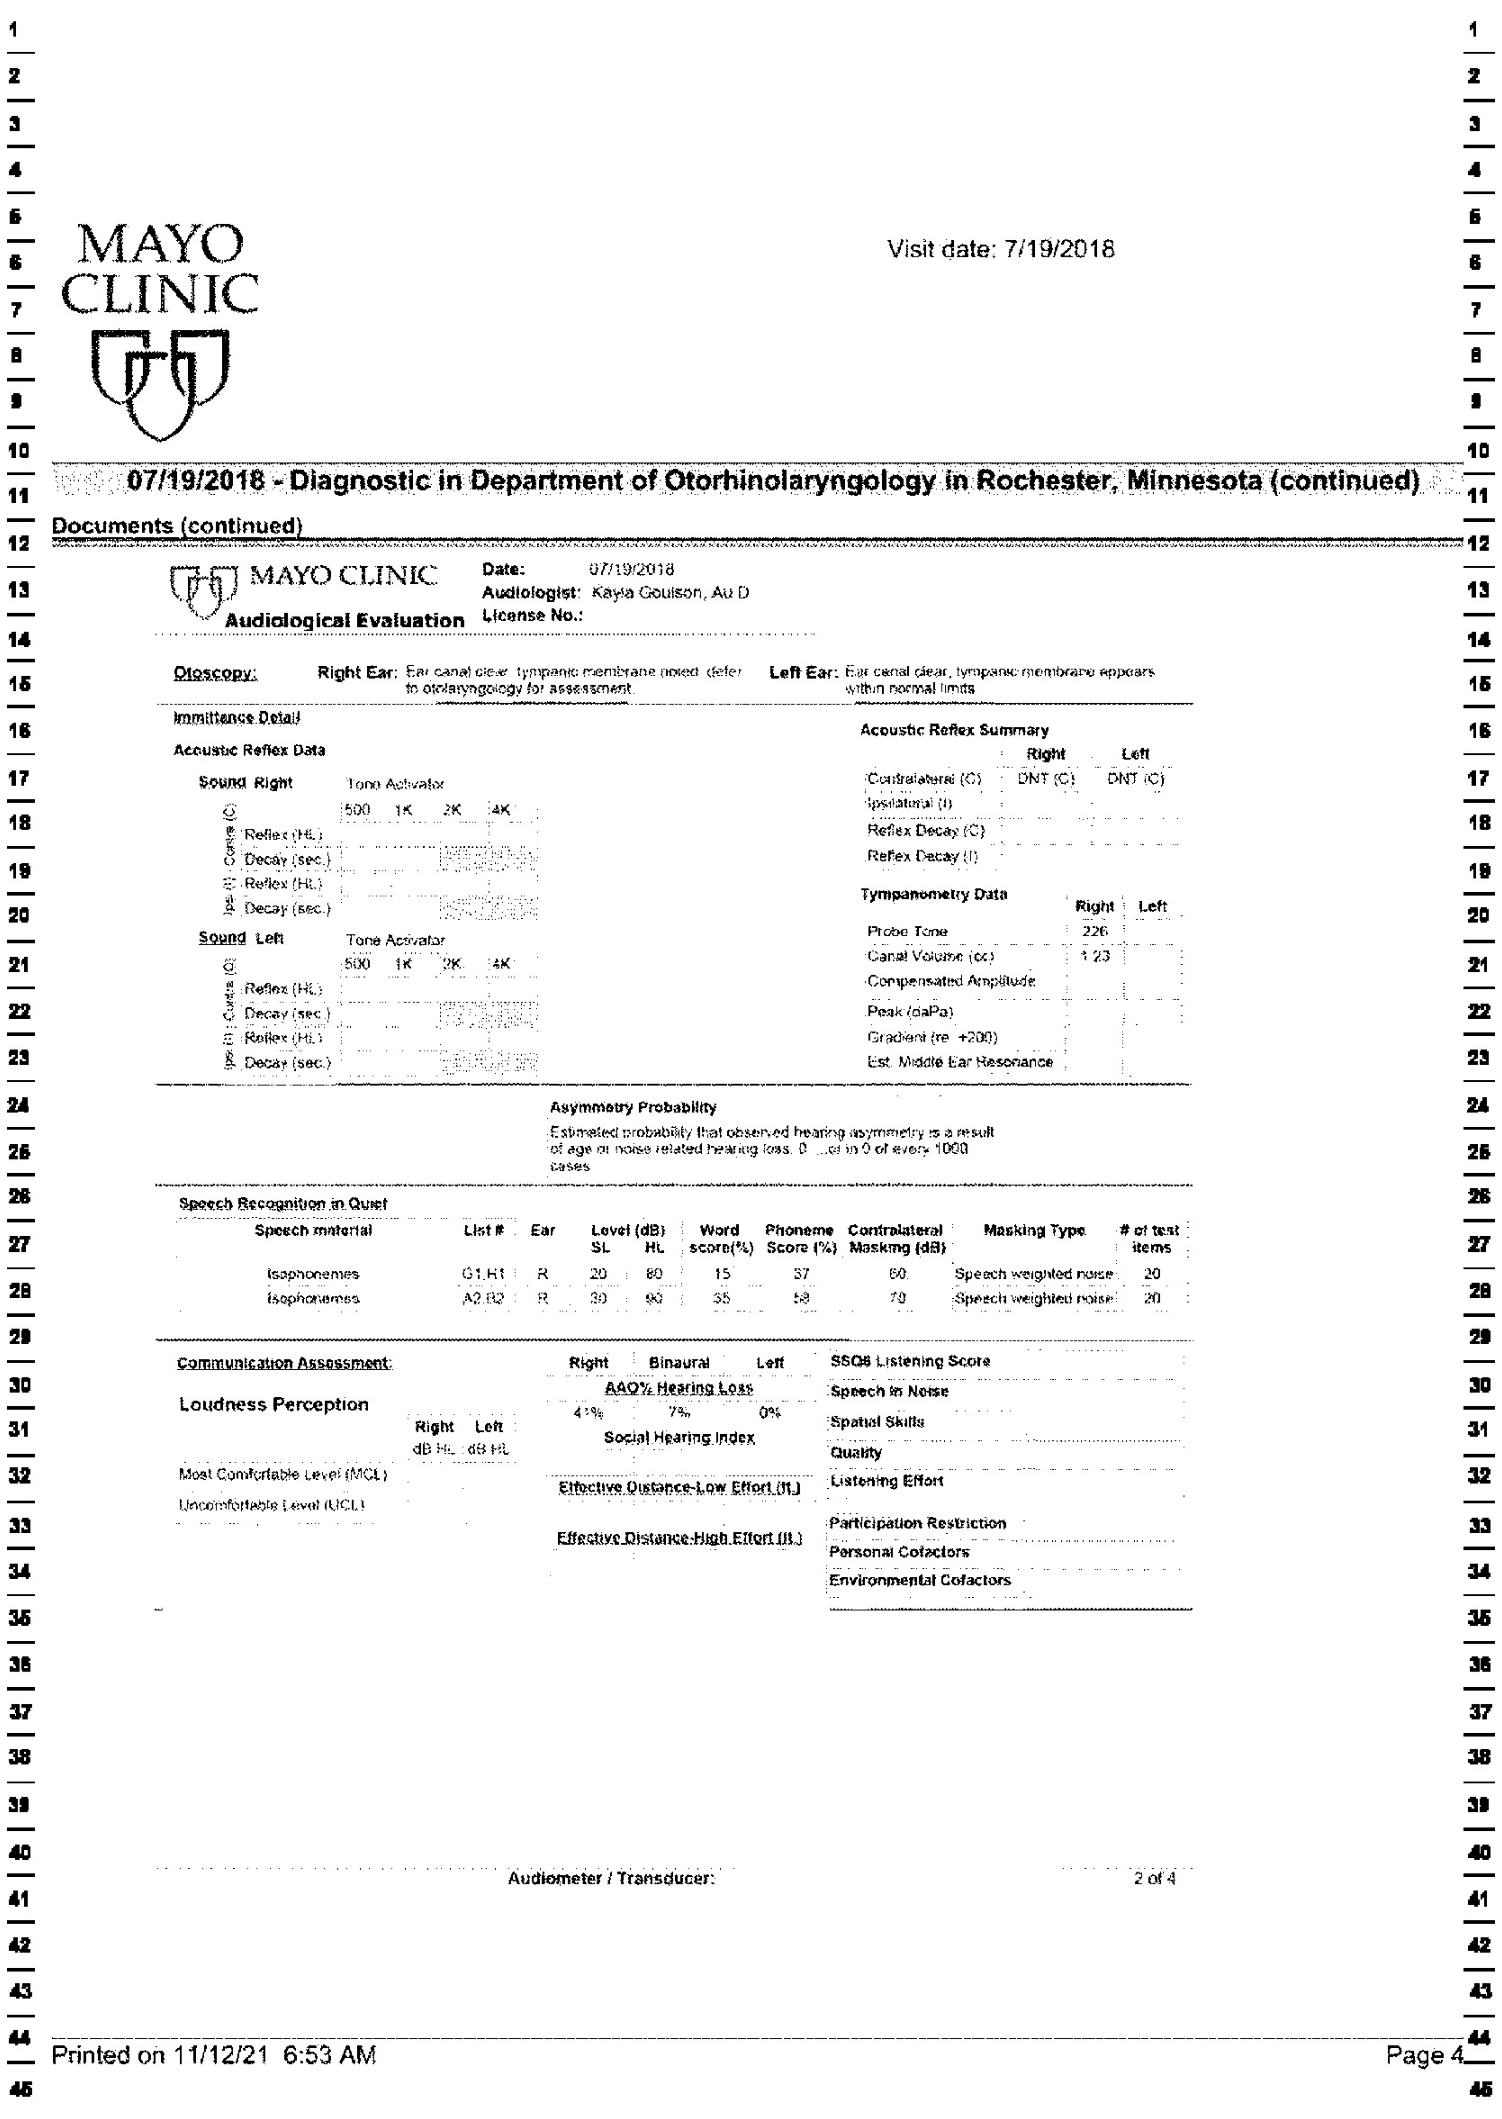

In [ ]:
image_result = cv2.imread("houghlines.jpg")
img_display(image_result)

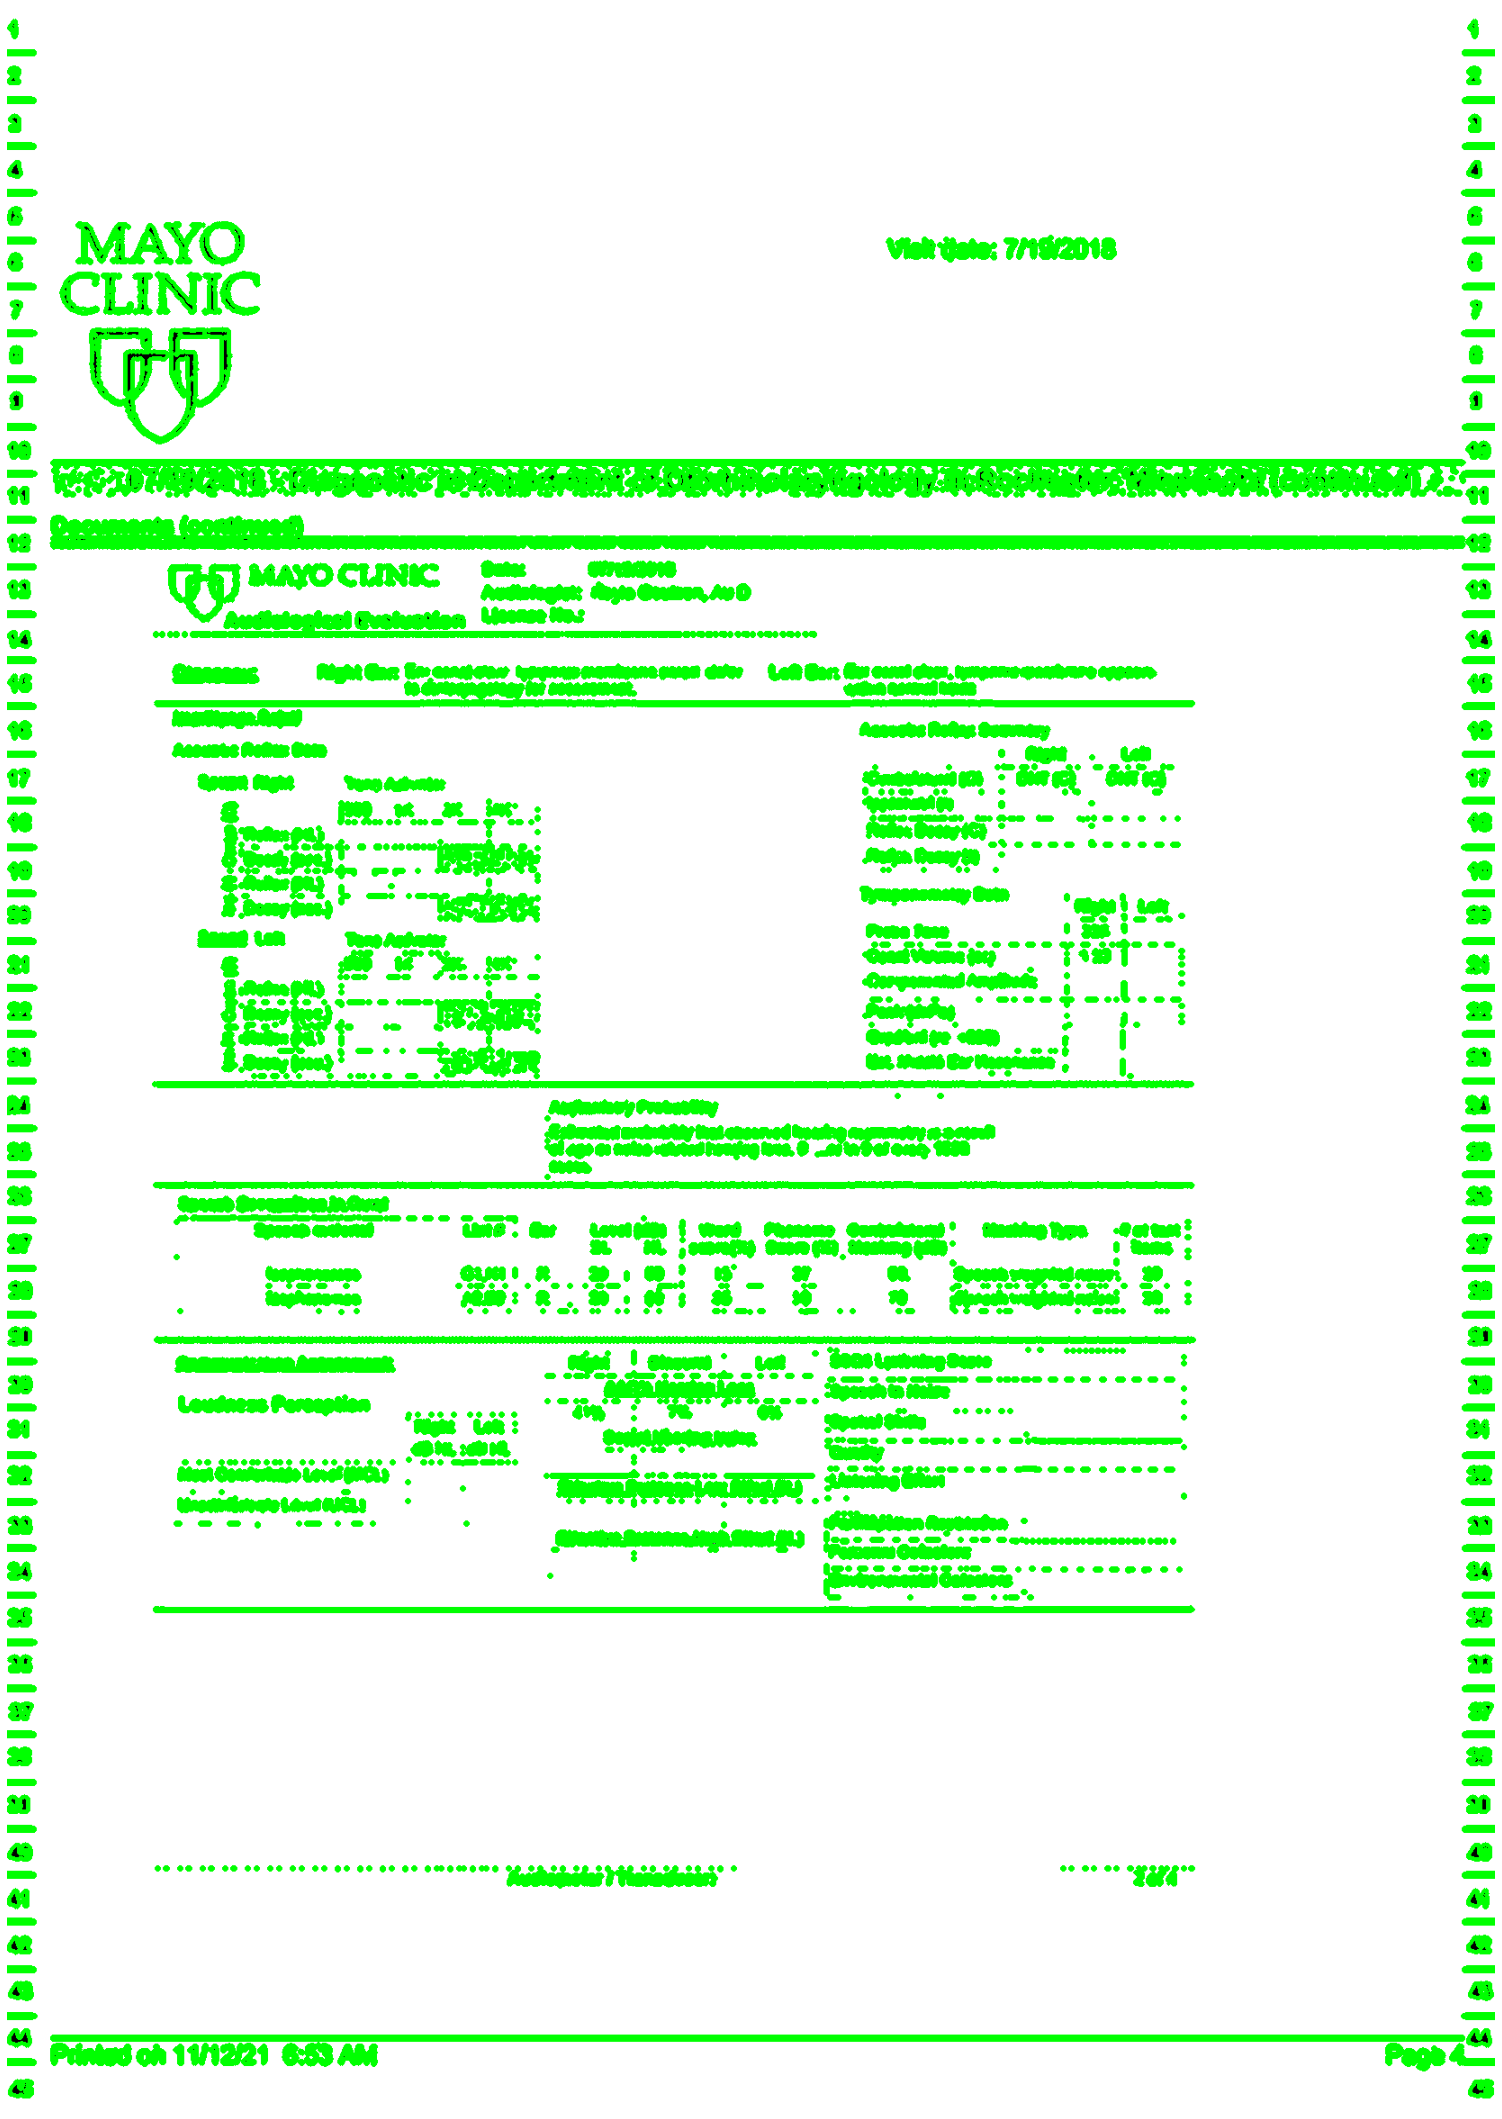

In [ ]:
image = cv2.imread('sample2.png')
im_bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blur = cv2.GaussianBlur(im_bw, (5,5), 0)
im_bw = cv2.Canny(blur, 10, 90)

contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0,255,0), 3)
img_display(image)

###Image Cropping

In [ ]:
# Plot original image
image = cv2.imread(image_name)
print(image.shape)

(2339, 1653, 3)


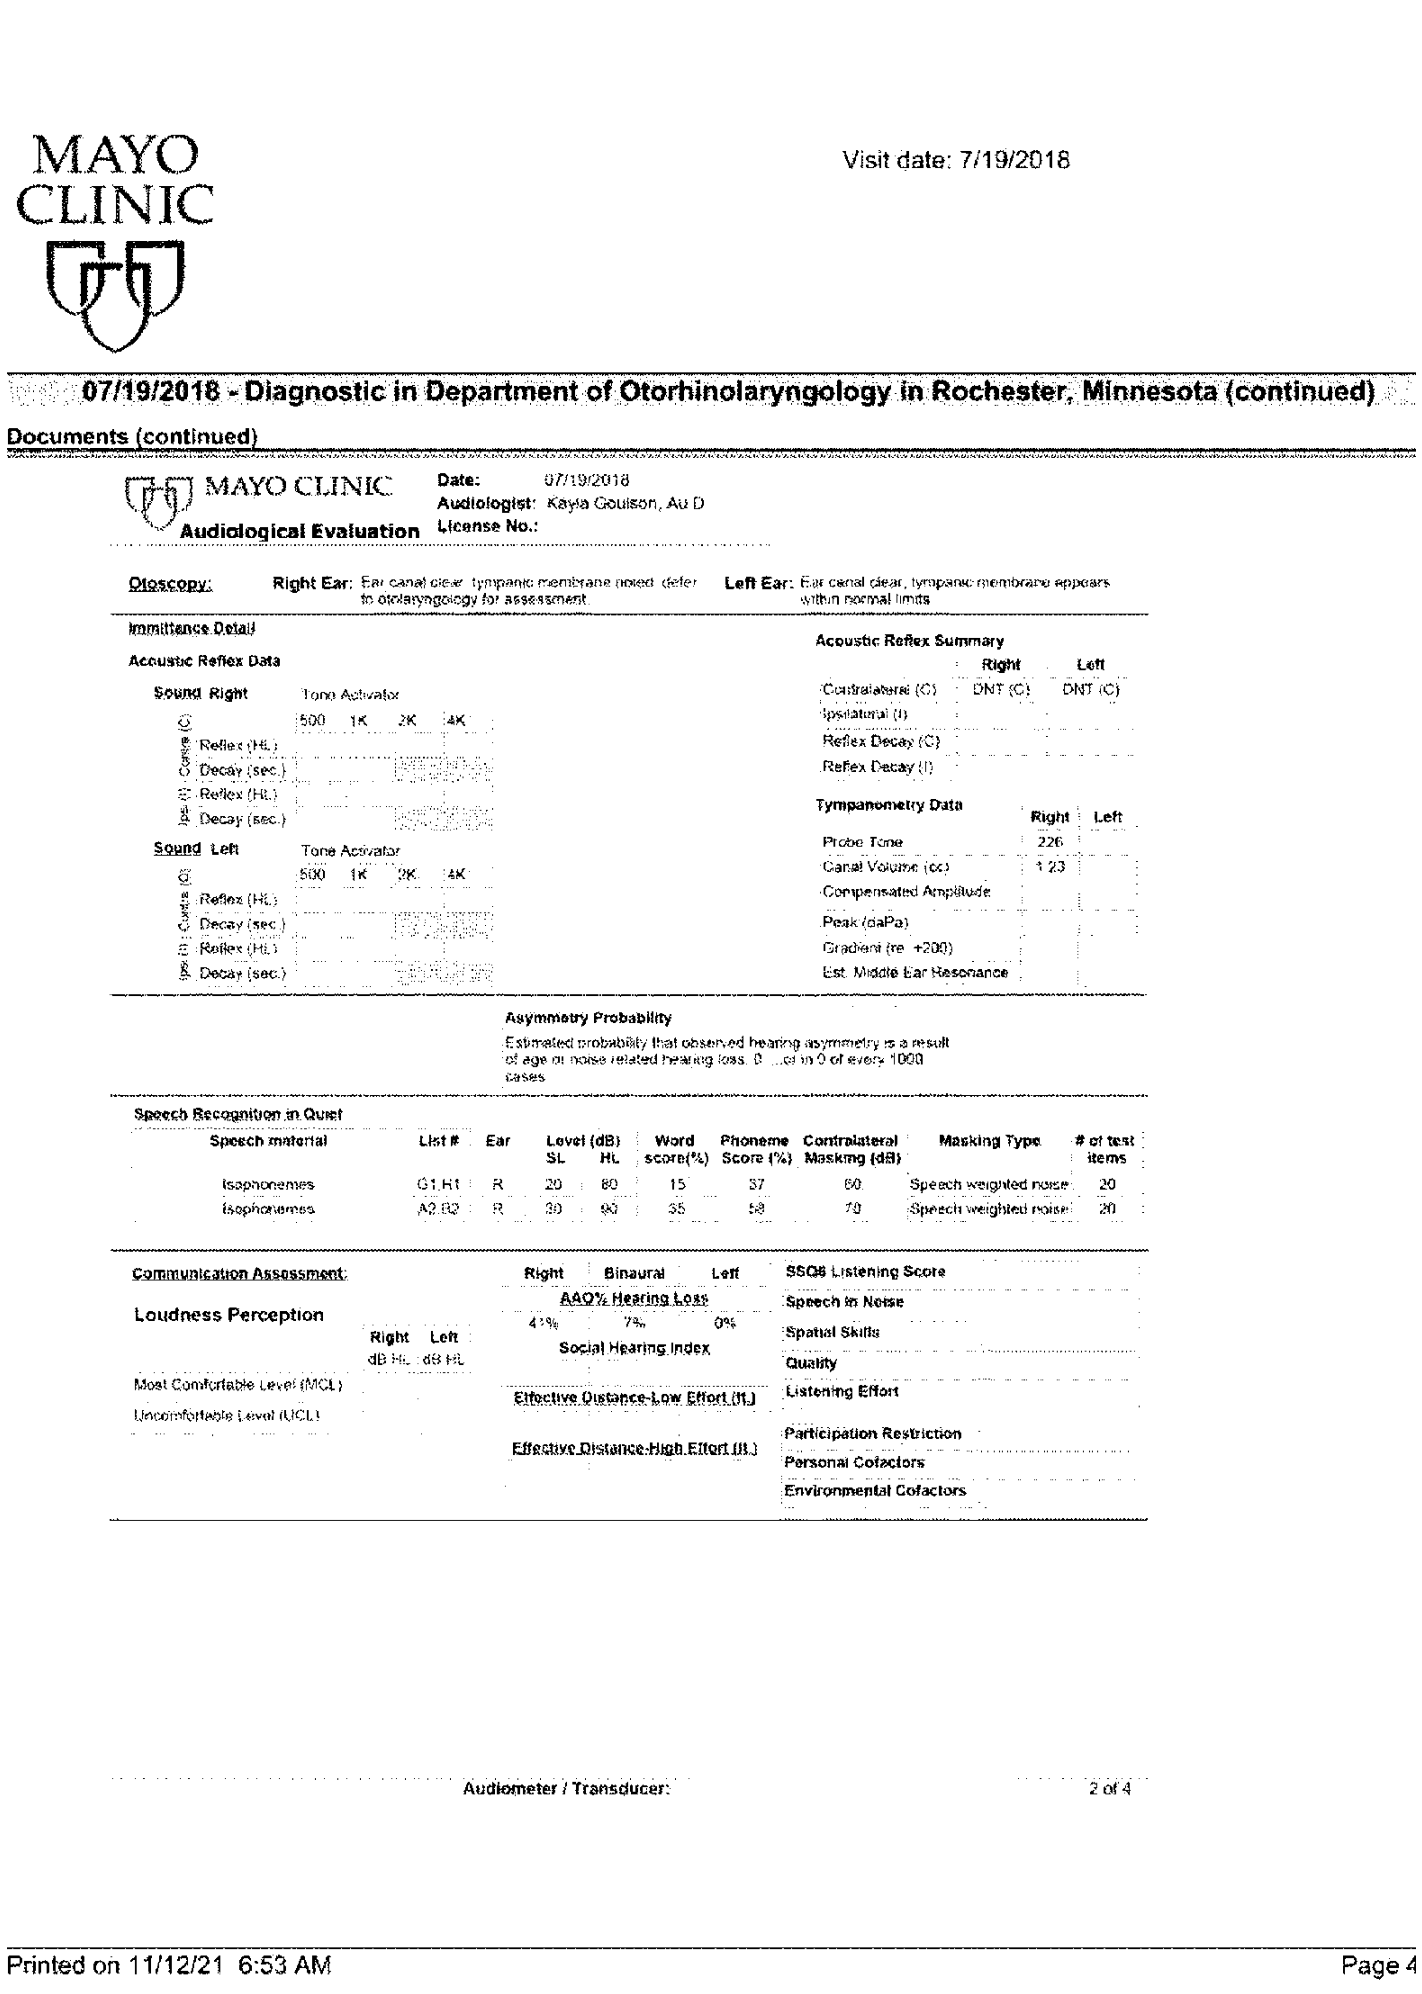

In [ ]:
# Cropping an image
cropped_image = image[100:2300, 50:1615]  # slicing image[rows, columns]
img_display(cropped_image)

##Combining image preprocessing and OCR

###Image preprocessing

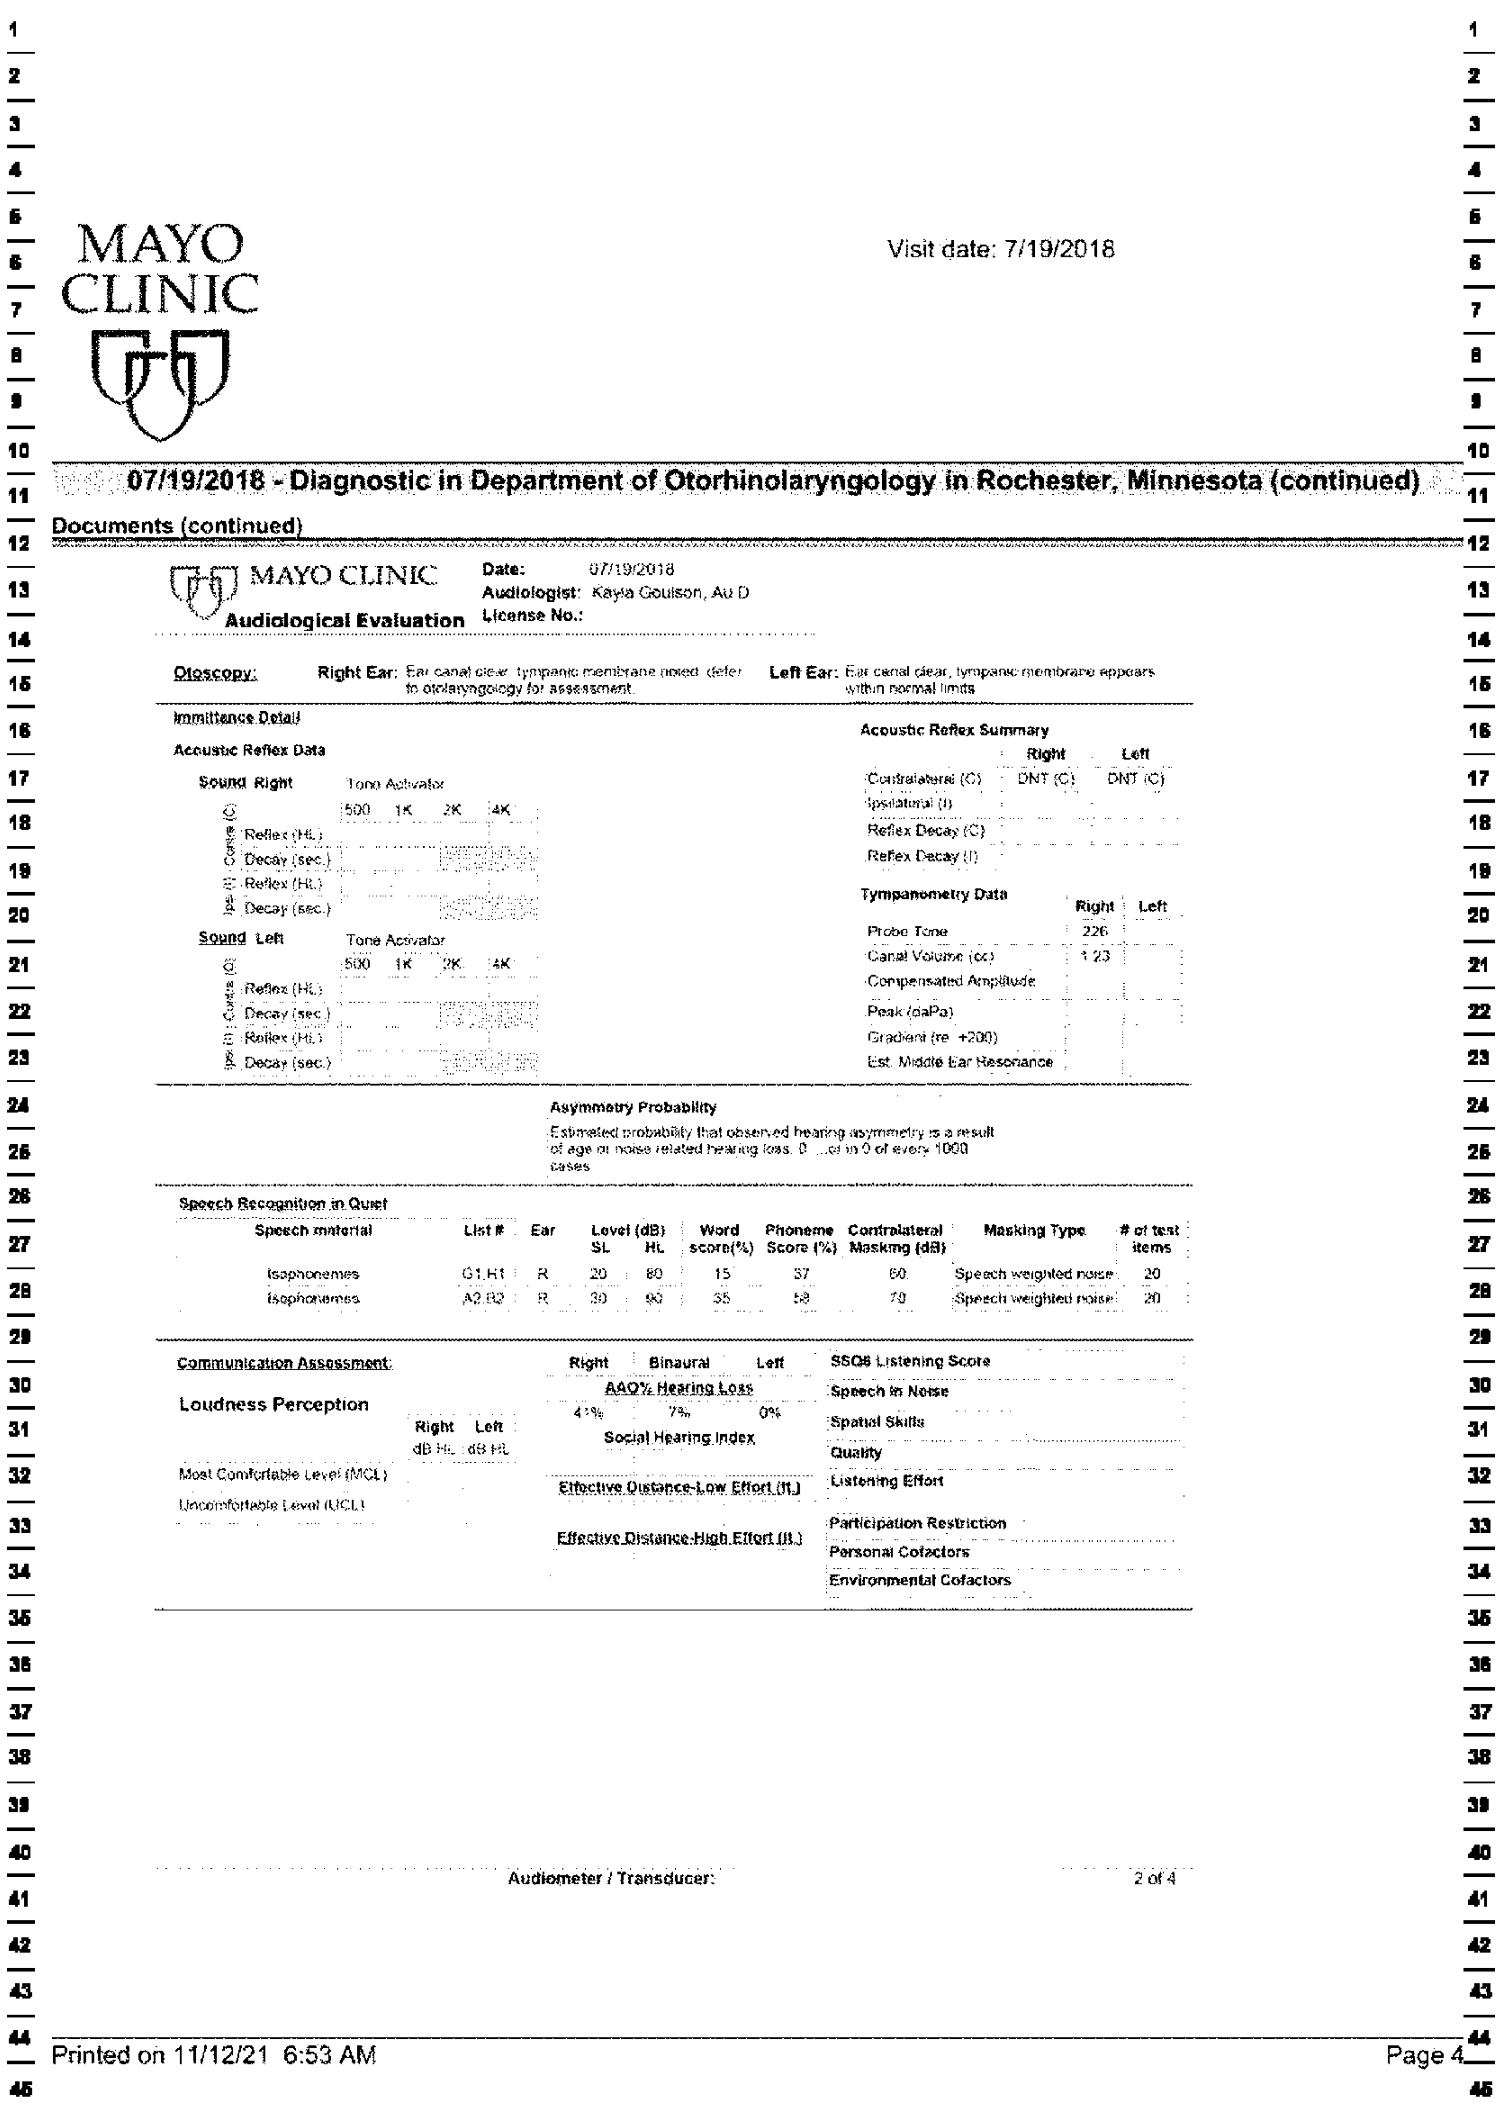

In [16]:
img_display(image)

In [10]:
def image_preprocessing(image_path, font_thick=False):
  image = cv2.imread(image_name)

  ############ Step-1: Image Binarization ##############################
  # Binarization
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Thresholding 
  img_thresh, img_binary = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

  ############ Step-2: Noise removal ###################################
  # removing noise
  image = noise_removal(img_binary)

  ############ Step-3: Image dilation ###################################
  if font_thick:
    # increase font thickness using dilation
    image = thick_font(image)

  ############ Step-4: Image cropping ###################################
  # Cropping an image, shape(2339, 1653, 3)
  # slicing image[rows, columns] like [100:2289, 50:1603] = [(2339 + 100 - 2339): (2339 - 50), ()1653 + 50 - 1653): (1653 - 50)] 
  image = image[(image.shape[0] + 100 - image.shape[0]): (image.shape[0] - 50), (image.shape[1] + 50 - image.shape[1]): (image.shape[1] - 50)]

  return image

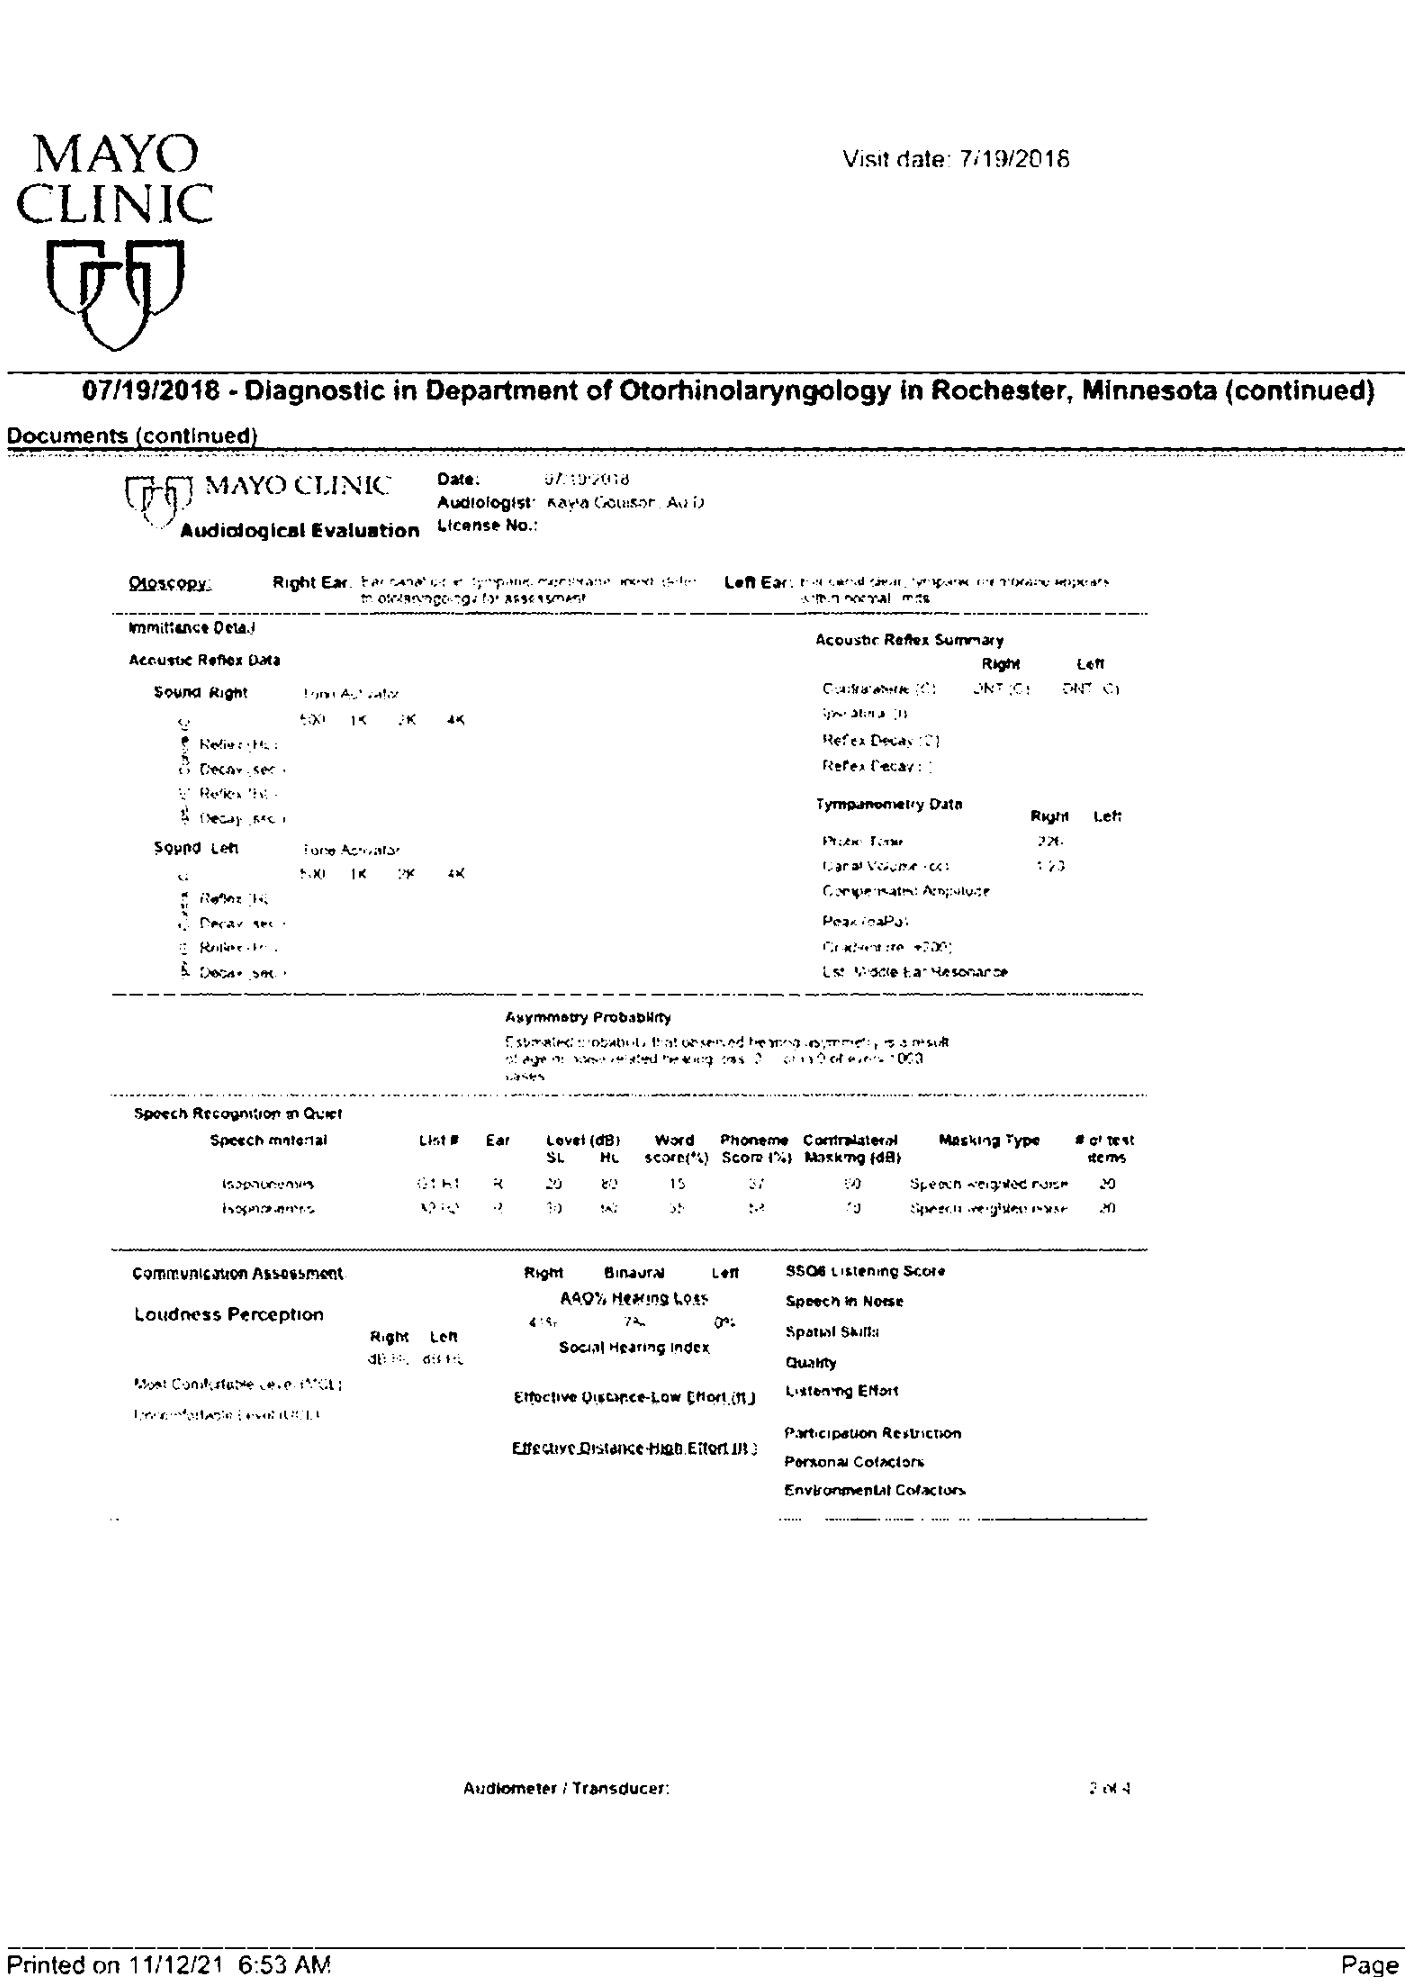

In [19]:
cleaned_image = image_preprocessing(image_name, font_thick=False)

img_display(cleaned_image)

###Image OCR

In [20]:
############ Step-4: Image OCR ###################################
custom_config = r'--oem 3 --psm 6'
print('--------------------------------------------------------------')
# extract text from image
print(pytesseract.image_to_string(cleaned_image, config=custom_config))
# print(pytesseract.image_to_string(image, config=custom_config))
print('--------------------------------------------------------------')

--------------------------------------------------------------
MAYO Visit date: 7/19/2018
07/19/2018 - Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued)
Documents (continued)
(fr MAYO CLINIC Ome: SEwOamE
ra es Audiologist’ Aaya Gousor. Au i?
\ .
-“ mudiotogical Evaluation seanse No.:
Ohoscopy: Right Ear. bar cane e poping. maretane me ele Leff Bar. bat cmnd dean ympan ee Tbtdoy appears
th otelancage.tgs fot Anse ment SIRT aoe nal ie
its J
SCC Acoustc Reftex Summary
Accuste Refiex Data Right Lett
Sound Right Lon Ac! cater Contam 0 ONT GE TNT OD
e x eK aK camera
© Relies be: Refex Devay (0)
3 Gecar ser: Refer Cecay: *
ty Reties Fe
Tympanomel:
B trecap nec petty Data Right Lett
Sovnd Let Fore Acevata Prac Kew 2m
° eee mane. (ara! Verine ct 173
< itehar 1s Gonpenatn: Ampluse
a Decay vec - Pear ‘raPos
Renee be. Megcent te 9200:
BR Deca sac ist “sce tan Nasonarce
Auymmatry Probabiitty
Esbmaled cokabel, hat orsered bey asym) 2 mst
Mage on ane etd he aieg cas 